# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


<h2> Data Validation </h2>

Firstly we read the data into a pandas dataframe to understand the structure, completness and other important aspects of the data. Using cells I will describe the data and its structure.

<h3> cell 1 </h3> 
Cell 1 shows the initial reading and a preview of the dataset. 

<h3> cell 2  </h3>
Cell 2 shows us the statistics of the numerical columns (sugar , protien , carbs , calories). The statistics include metrics such as minimum value , maximum value , count , mean etc.

<h3> cell 3  </h3>
Cell 3 shows the number of missing values within each column.

<h3> Key Findings </h3>
The dataset consists of 947 rows with 8 columns. However some of the columns are not as mentioned: <br>
- recipe : numeric column with a unique identifier. No duplicate values. <b>No change needed. </b> <br>
- calories : numeric column containing calories of each reciepe. <b>Needs imputation of missing values.</b> <br>
- carbohydrates : numeric column containing carbs in each reciepe. <b>Needs imputation of missing values.</b> <br>
- sugar : numeric column containing sugar in each reciepe. <b>Needs imputation of missing values.</b> <br>
- protien : numeric column containing protien in each reciepe. <b>Needs imputation of missing values.</b> <br>
- category : category column containing the type of reciepe. Contains 1 extra category. <b>Needs change of values.</b> <br>
- servings : numeric column containing number of servings. However the column is stored as datatype 'category' with non-numeric strings. <b>Needs change of datatype and values.</b> <br>
- high_traffic : category column containing wether or not the reciepe brings high traffic. However, there is no indicator if the reciepe does not bring high traffic. <b>Needs change of values.</b> <br>

In [44]:
!pip install feature_engine
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score , recall_score , f1_score , precision_score

sns.set_palette('icefire')

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [45]:
df = pd.read_csv("recipe_site_traffic_2212.csv")

df

recipe  calories  carbohydrate  ...      category  servings high_traffic
0         1       NaN           NaN  ...          Pork         6         High
1         2     35.48         38.56  ...        Potato         4         High
2         3    914.28         42.68  ...     Breakfast         1          NaN
3         4     97.03         30.56  ...     Beverages         4         High
4         5     27.05          1.85  ...     Beverages         4          NaN
..      ...       ...           ...  ...           ...       ...          ...
942     943   1161.00          5.31  ...  Lunch/Snacks         2          NaN
943     944       NaN           NaN  ...        Potato         2         High
944     945    951.74         29.42  ...          Pork         2         High
945     946    266.61         35.77  ...        Potato         6         High
946     947    184.56         45.21  ...     Beverages         4          NaN

[947 rows x 8 columns]

In [46]:
#describing dataset 
df.columns

Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'category',
       'servings', 'high_traffic'],
      dtype='object')

In [47]:
df.shape

(947, 8)

In [48]:
df.describe()

recipe     calories  carbohydrate       sugar     protein
count  947.000000   895.000000    895.000000  895.000000  895.000000
mean   474.000000   435.939196     35.069676    9.046547   24.149296
std    273.519652   453.020997     43.949032   14.679176   36.369739
min      1.000000     0.140000      0.030000    0.010000    0.000000
25%    237.500000   110.430000      8.375000    1.690000    3.195000
50%    474.000000   288.550000     21.480000    4.550000   10.800000
75%    710.500000   597.650000     44.965000    9.800000   30.200000
max    947.000000  3633.160000    530.420000  148.750000  363.360000

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [50]:
#checkig null values in each column
df.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [51]:
#checking if reciepe is unique
df['recipe'].duplicated().sum()

0

In [52]:
#analyzing categorical columns
char_df = df[['category' , 'high_traffic' , 'servings']]

for col in char_df.columns:
    print('unique values in {} : {}'.format(col , df[col].unique()))
    print('number of unique values in {} : {}'.format(col , df[col].nunique()))
    print('Count of Values in {} :\n {} \n'.format(col , df[col].value_counts()))

unique values in category : ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']
number of unique values in category : 11
Count of Values in category :
 category
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: count, dtype: int64 

unique values in high_traffic : ['High' nan]
number of unique values in high_traffic : 1
Count of Values in high_traffic :
 high_traffic
High    574
Name: count, dtype: int64 

unique values in servings : ['6' '4' '1' '2' '4 as a snack' '6 as a snack']
number of unique values in servings : 6
Count of Values in servings :
 servings
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: count, dtype: int64 



<h2> Data Visualization Of Inconsistencies </h2>
Before carrying out any data visualisation, some key attributes within the dataset need to be addressed to effectively communicate the visualisations. These are: <br>
- The column <b>high_traffic</b> does not contain any meaningful value/denotion if a recipe is not high traffi. <br>
- The column <b>category</b> contains an extra category labelled as 'Chicken Breast'. This can hinder results as recipes that should be classified as 'Chicken' are considered 'Chicken Breast' making it more sophisticated to analyze and less accurate results. <br>
- The column <b>servings</b> contains non-numeric strings such as '4 as a snack' '6 as a snack' making the data inconsistent and not in the correct format.

<h3> Count of Traffic Recipes </h3>
Here we see that the given plot is not accurate, since the column 'high_traffic' contains NaN values for recipes that have low traffic which cannot be displayed on a graph.

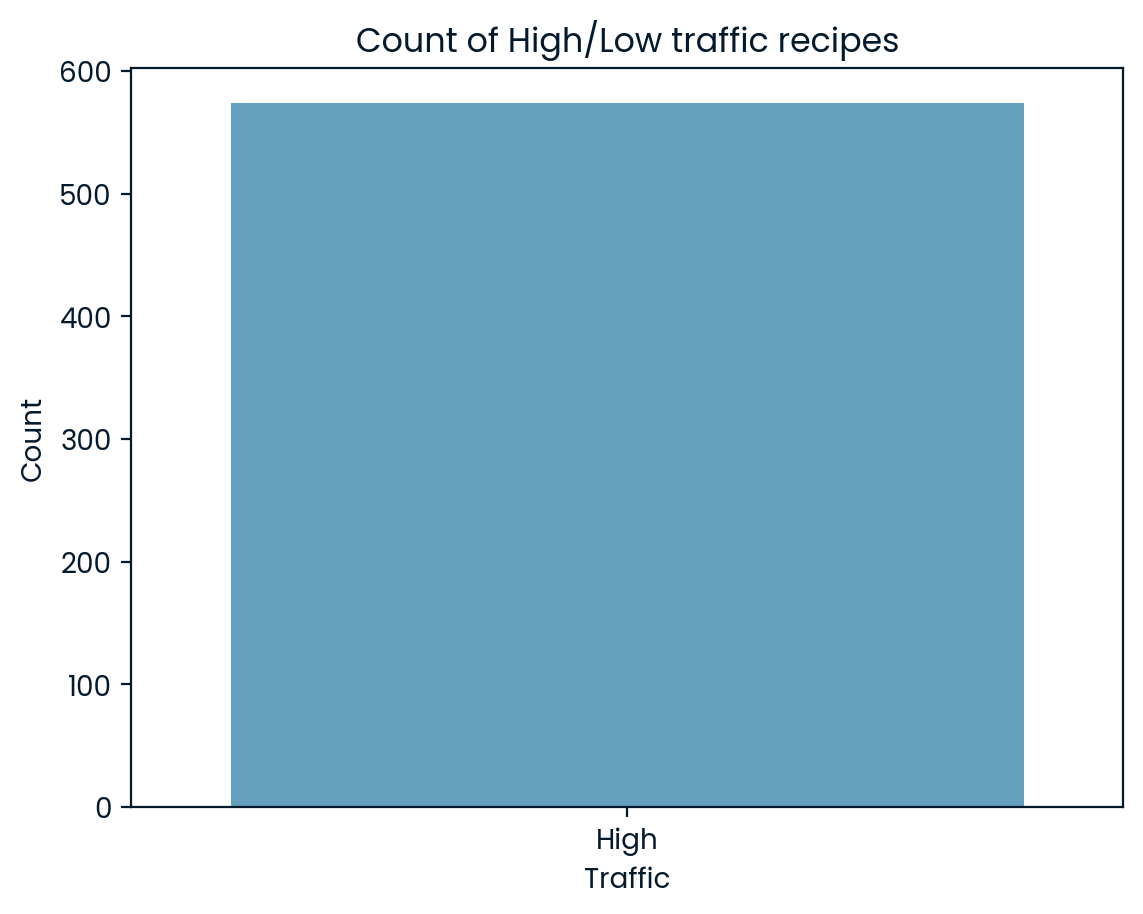

In [53]:
sns.countplot(x = 'high_traffic' , data = df)
plt.xlabel('Traffic')
plt.ylabel('Count')
plt.title('Count of High/Low traffic recipes')
plt.show()

<h3> Count of Category </h3>
For categories, there exists an extra category 'Chicken Breast' that adds an extra category and gives inaccurate and misleading results for the dataset.

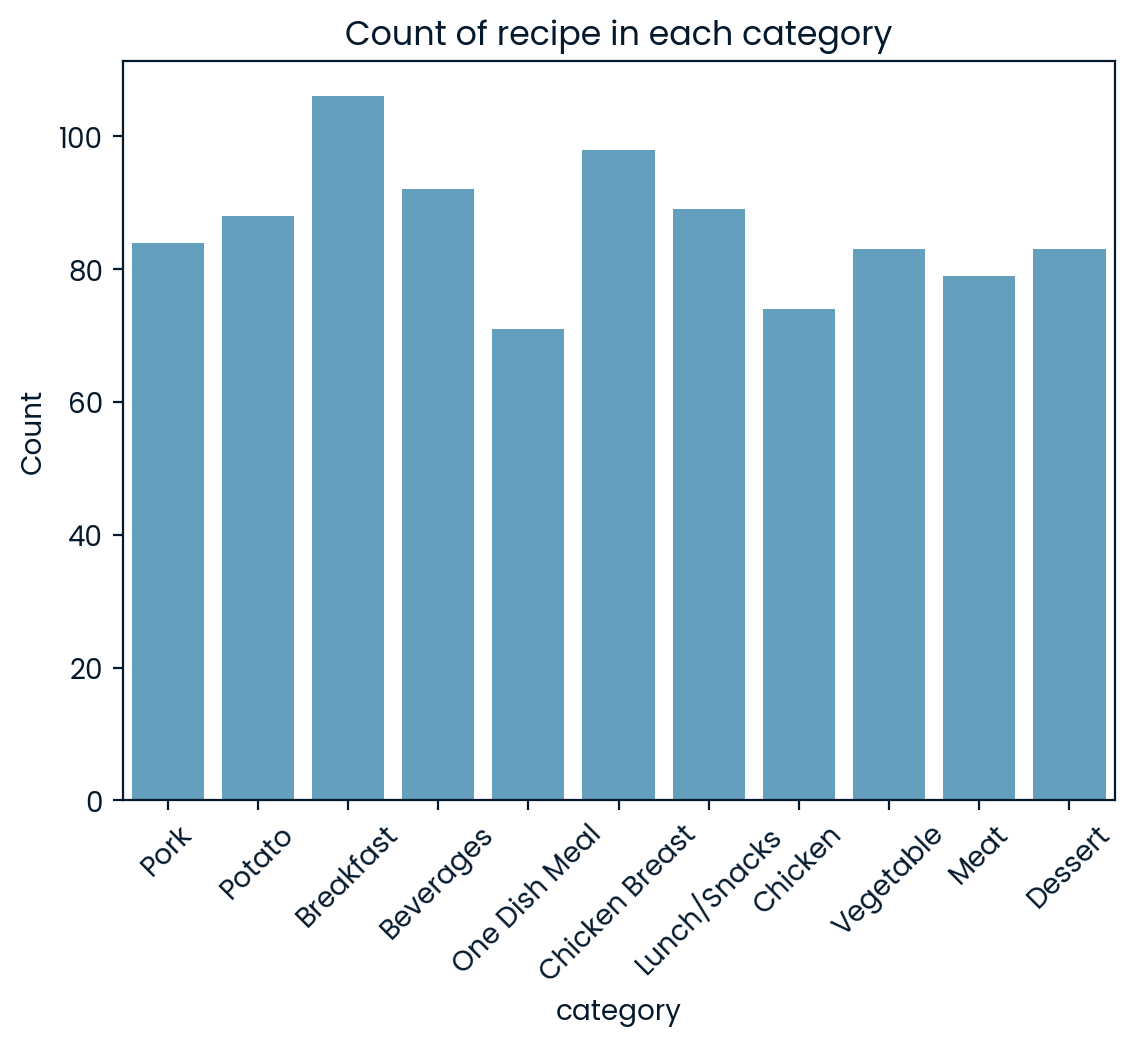

In [54]:
sns.countplot(x = 'category' , data = df)
plt.xlabel('category')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.title('Count of recipe in each category')
plt.show()

<h3> Count of Servings </h3>
For the number of servings, there exists extra non-numeric strings making the data inconsistent.

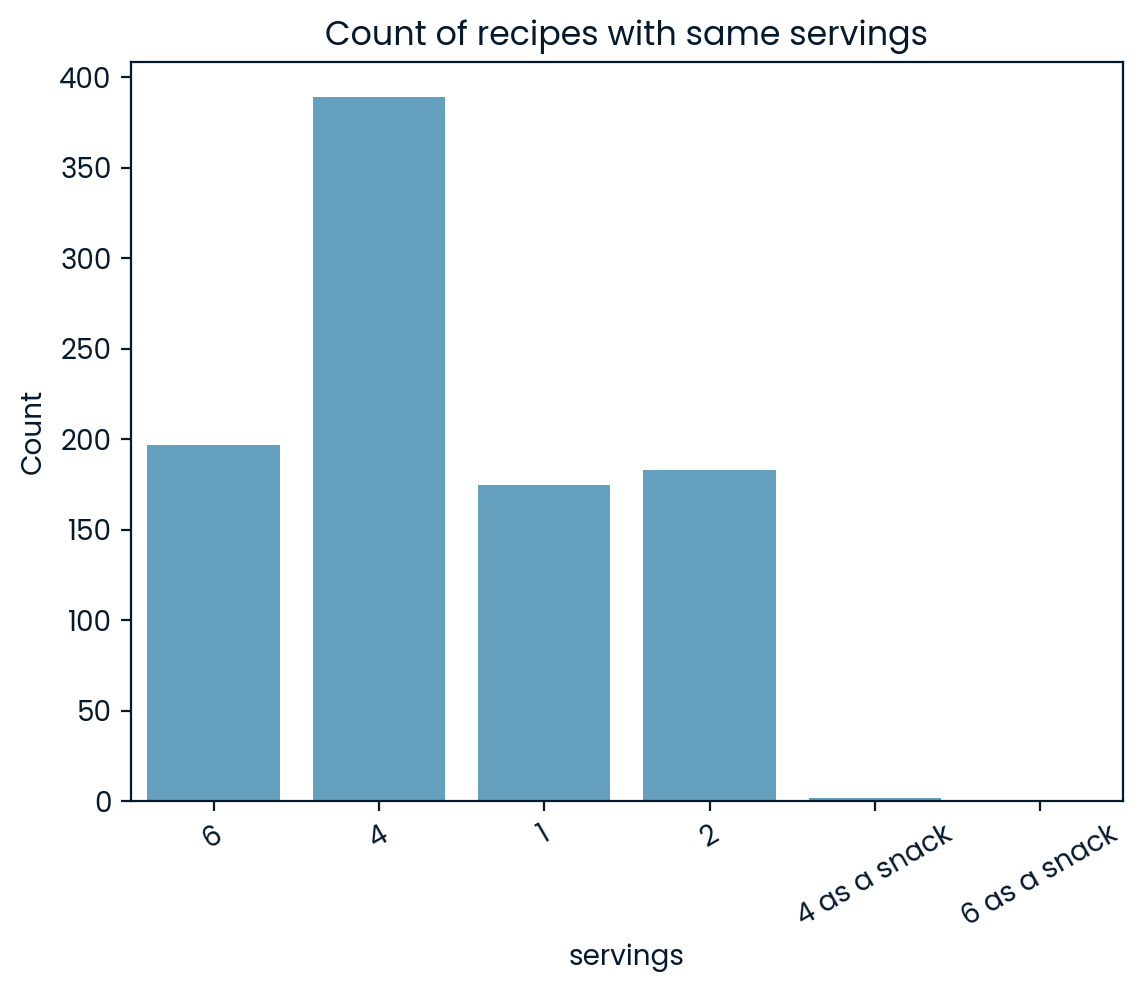

In [55]:
sns.countplot(x = 'servings' , data = df)
plt.xlabel('servings')
plt.xticks(rotation = 30)
plt.ylabel('Count')
plt.title('Count of recipes with same servings')
plt.show()

<h2> Data Formatting/Transformation </h2>
Now, we perform a set of transformations and some formatting operations to fix the inconsistent data so that it is consistent and according to the given format, making it easier to process, visualize and find key insights.

<h3> Category Column </h3>
The category column is corrected by replacing the value 'Chicken Breast' with 'Chicken' as Chicken Breast recipes are the same as Chicken recipes. This removes the extra category and corrects the data inconsistency.

In [56]:
df['category'] = df['category'].replace('Chicken Breast' , 'Chicken')

df['category'].value_counts()

category
Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: count, dtype: int64

<h3> High_Traffic Column </h3>
The high_traffic column is corrected by replacing NaN/null/empty values with the label 'low' , indicating that these recipes provide low traffic to the site.

In [58]:
df['high_traffic'].fillna('Low' , inplace = True)

df['high_traffic'].value_counts()

high_traffic
High    574
Low     373
Name: count, dtype: int64

<h3> Servings Column </h3>
The servings column is corrected by dropping rows with strings. Since the strings/values '4 as a snack' and '6 as a snack' a total of 3 rows. Hence, the inconsistency is easily fixed by dropping the rows and converting the column back to integer. 

In [59]:
df.drop(np.where((df['servings'] == '4 as a snack') | (df['servings'] == '6 as a snack'))[0] , inplace = True)

df['servings'] = df['servings'].astype(int)

df['servings'].value_counts()

servings
4    389
6    197
2    183
1    175
Name: count, dtype: int64

<h3> Additional Changes </h3>
To make the dataset more robust and useful, we drop the 'recipe' column since it contains no benefit for analyzing or for model building.

In [60]:
df = df.drop('recipe' , axis = 1)

df.head()

calories  carbohydrate  sugar  protein   category  servings high_traffic
0       NaN           NaN    NaN      NaN       Pork         6         High
1     35.48         38.56   0.66     0.92     Potato         4         High
2    914.28         42.68   3.09     2.88  Breakfast         1          Low
3     97.03         30.56  38.63     0.02  Beverages         4         High
4     27.05          1.85   0.80     0.53  Beverages         4          Low

<h2> Data Visualization </h2>
After formatting and transforming the dataset, we will now perform visual analysis on the dataset to understand and derive key insights.

<h3> Box Plot of Numerical Columns </h3>

The following box plots of the numerical columns show the distribution and the outliers. As seen, all the numerical columns contain many outliers and are skewwed to the right, indicating that the numerical (nutrition) columns contain values towards the lower side.

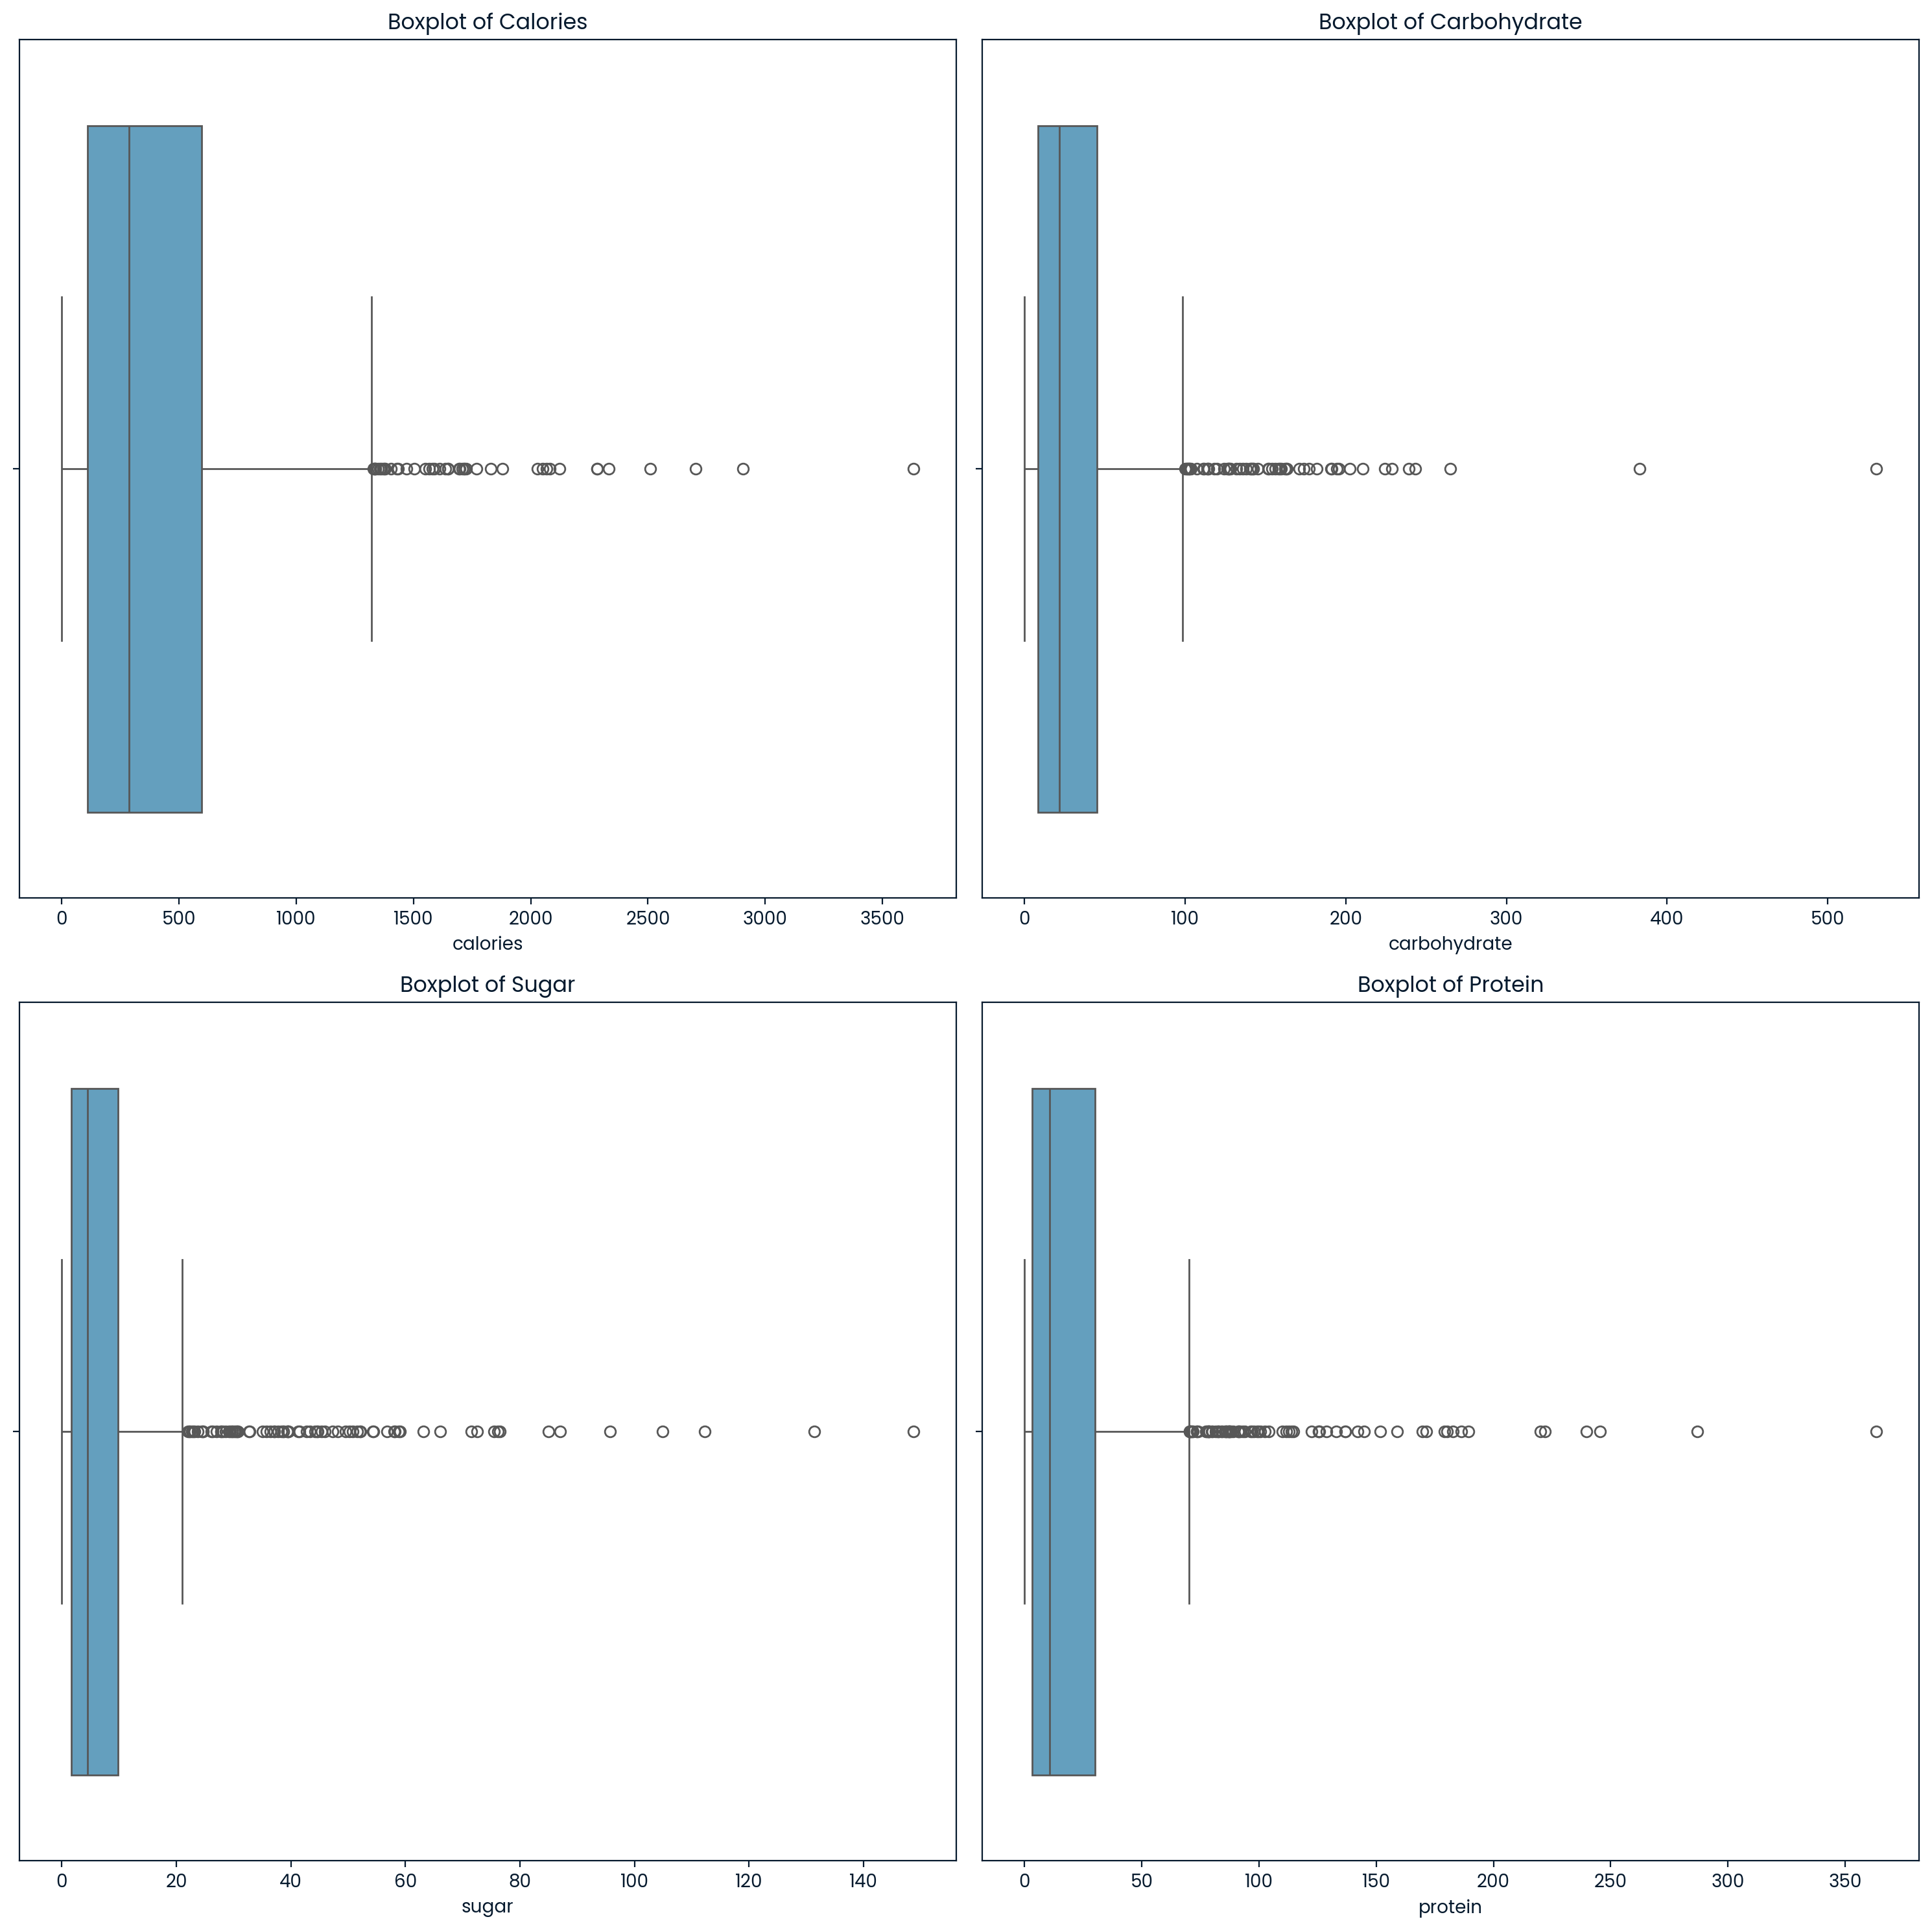

In [61]:
# Create a figure with 4 subplots
numericcols = ['calories' , 'carbohydrate' , 'sugar' , 'protein']

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

sns.boxplot(x = 'calories' , data = df , ax=axs[0, 0])
axs[0, 0].set_title('Boxplot of Calories')

sns.boxplot(x = 'carbohydrate', data = df , ax=axs[0, 1])
axs[0, 1].set_title('Boxplot of Carbohydrate')

sns.boxplot(x = 'sugar', data = df ,ax=axs[1, 0])
axs[1, 0].set_title('Boxplot of Sugar')

sns.boxplot(x = 'protein', data = df , ax=axs[1, 1])
axs[1, 1].set_title('Boxplot of Protein')

plt.tight_layout()
plt.show()

<h3> Distribution of Nutritional columns </h3>

To further validate our findings, we use the histogram to visualize the data and see that it is skewed heavily towards the right with many outliers towards the left. Using the KDE (Kernel Density Estimation) in the plots helps to analyze the distribution curve as well.

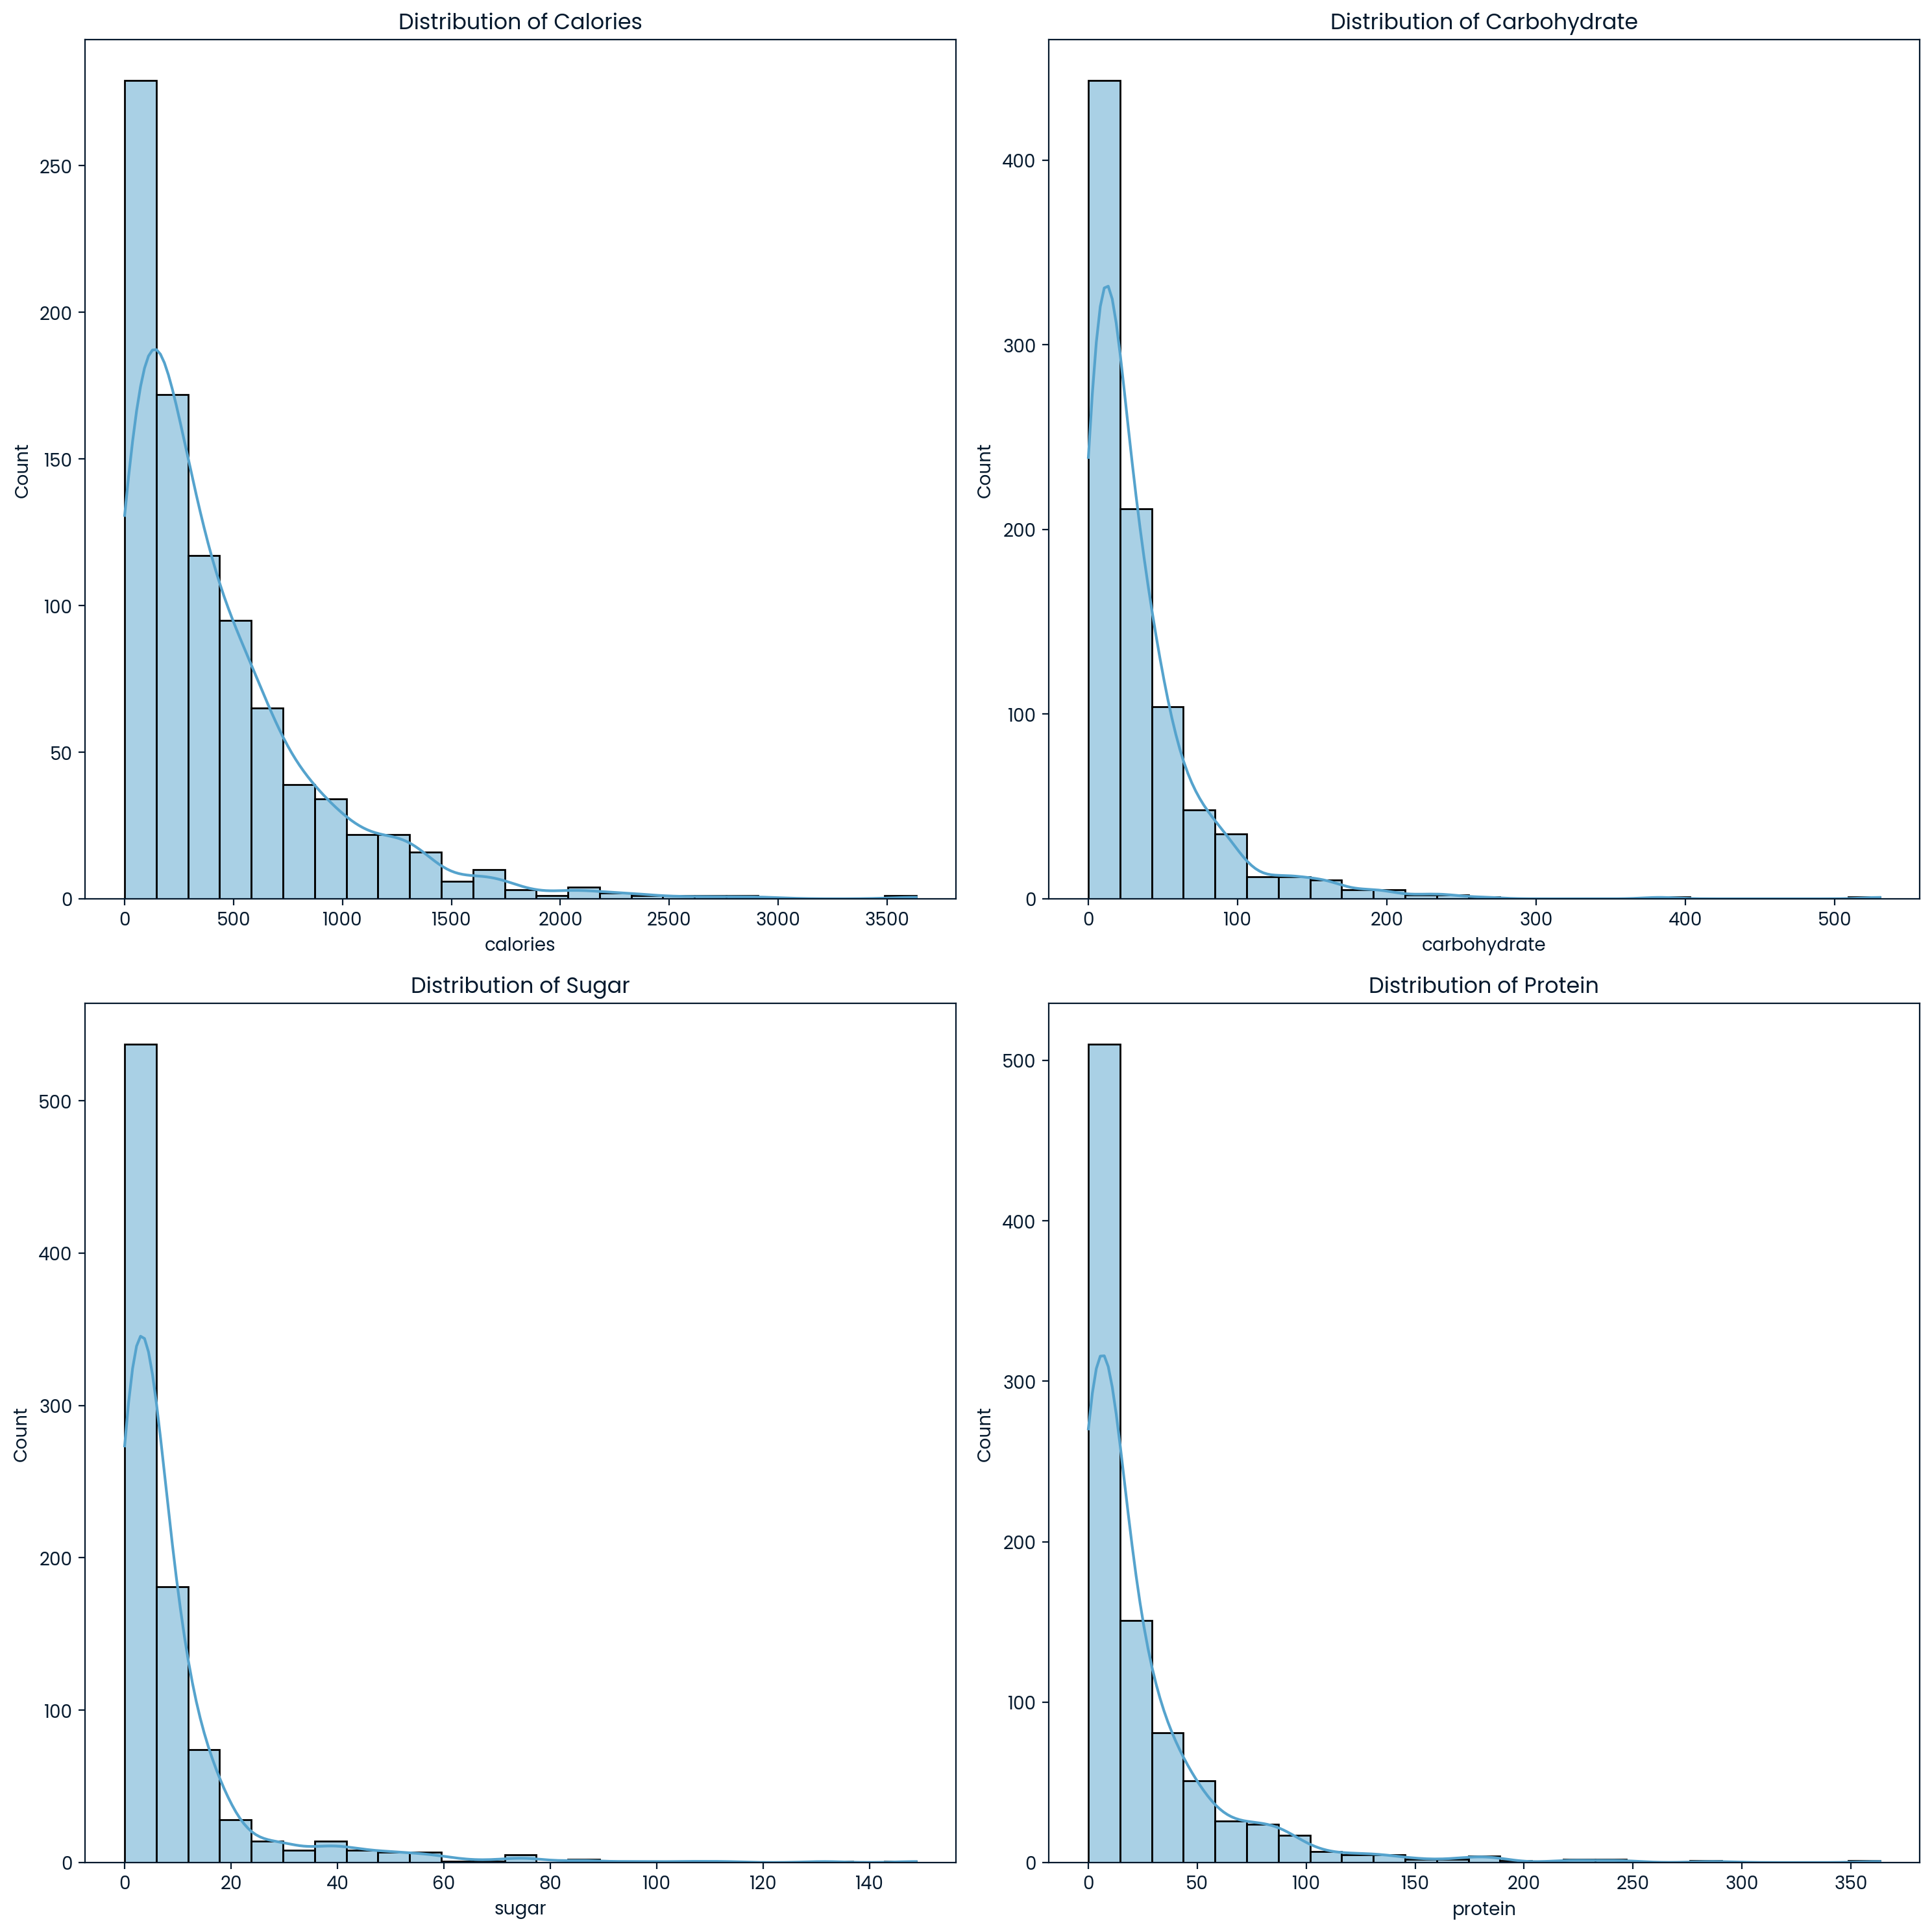

In [62]:
# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

#using 25 bins to make it easier to interpret
sns.histplot(x = 'calories' , data = df , ax=axs[0, 0] , kde = True , bins = 25)
axs[0, 0].set_title('Distribution of Calories')

sns.histplot(x = 'carbohydrate', data = df , ax=axs[0, 1] , kde = True , bins = 25)
axs[0, 1].set_title('Distribution of Carbohydrate')

sns.histplot(x = 'sugar', data = df ,ax=axs[1, 0] , kde = True , bins = 25)
axs[1, 0].set_title('Distribution of Sugar')

sns.histplot(x = 'protein', data = df , ax=axs[1, 1] , kde = True , bins = 25)
axs[1, 1].set_title('Distribution of Protein')

plt.tight_layout()
plt.show()

<h3> Servings by Traffic </h3>
Visualizing the servings by traffic, we see that the dataset contains more recipes with 4 servings than recipes with 1,2 and 6 servings. Hence, it can also be seen that the recipes with 4 servings contribute most to the recipe being high traffic. Furthermore, recipes with 2 servings have almost the same ratio of high to low traffic.  

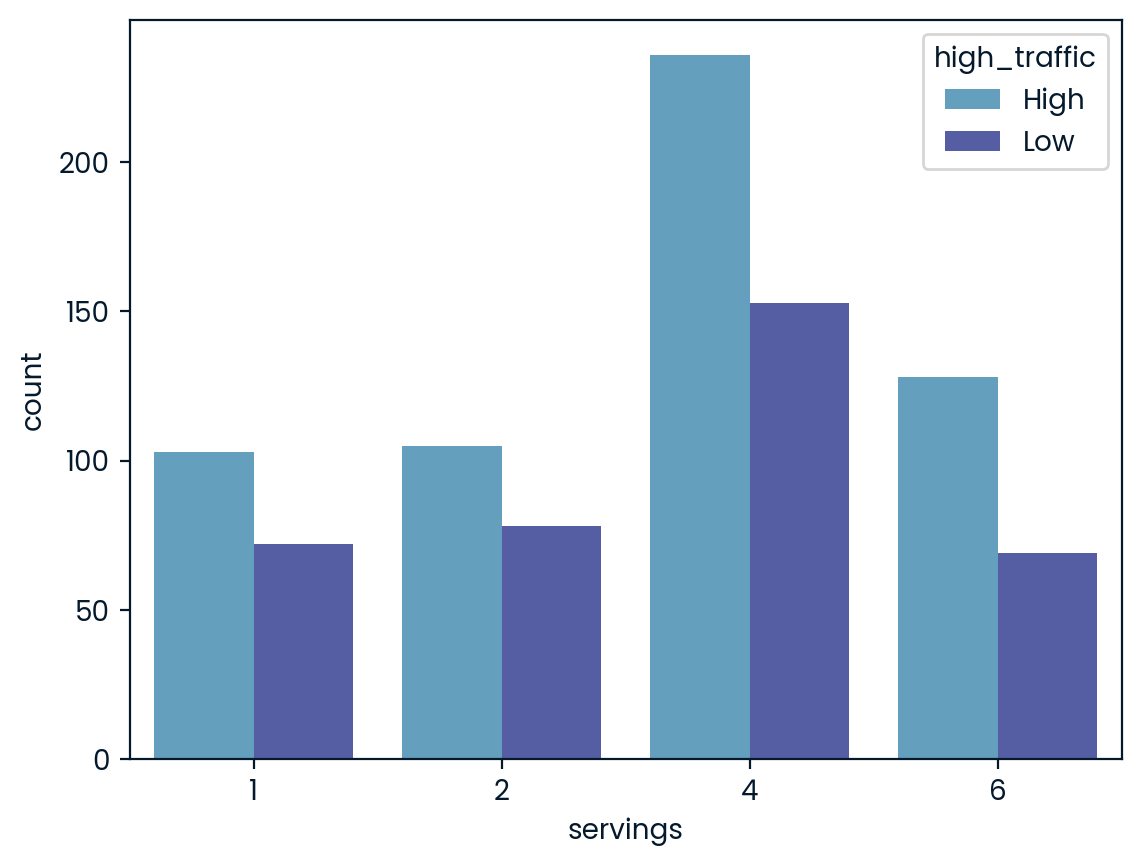

In [63]:
sns.countplot(x = 'servings' , hue= 'high_traffic', hue_order = ['High' , 'Low'] , data = df)
plt.show()

<h3> Category by Traffic </h3>
Visualizing the categories by traffic we can see that chicken and beverage recipes have the most recipes that are low in traffic. This means that chicken and beverage recipes seem to be reducing the traffic on the site. On the other hand, vegetable, pork and potato recipes contribute most to high traffic recipes.

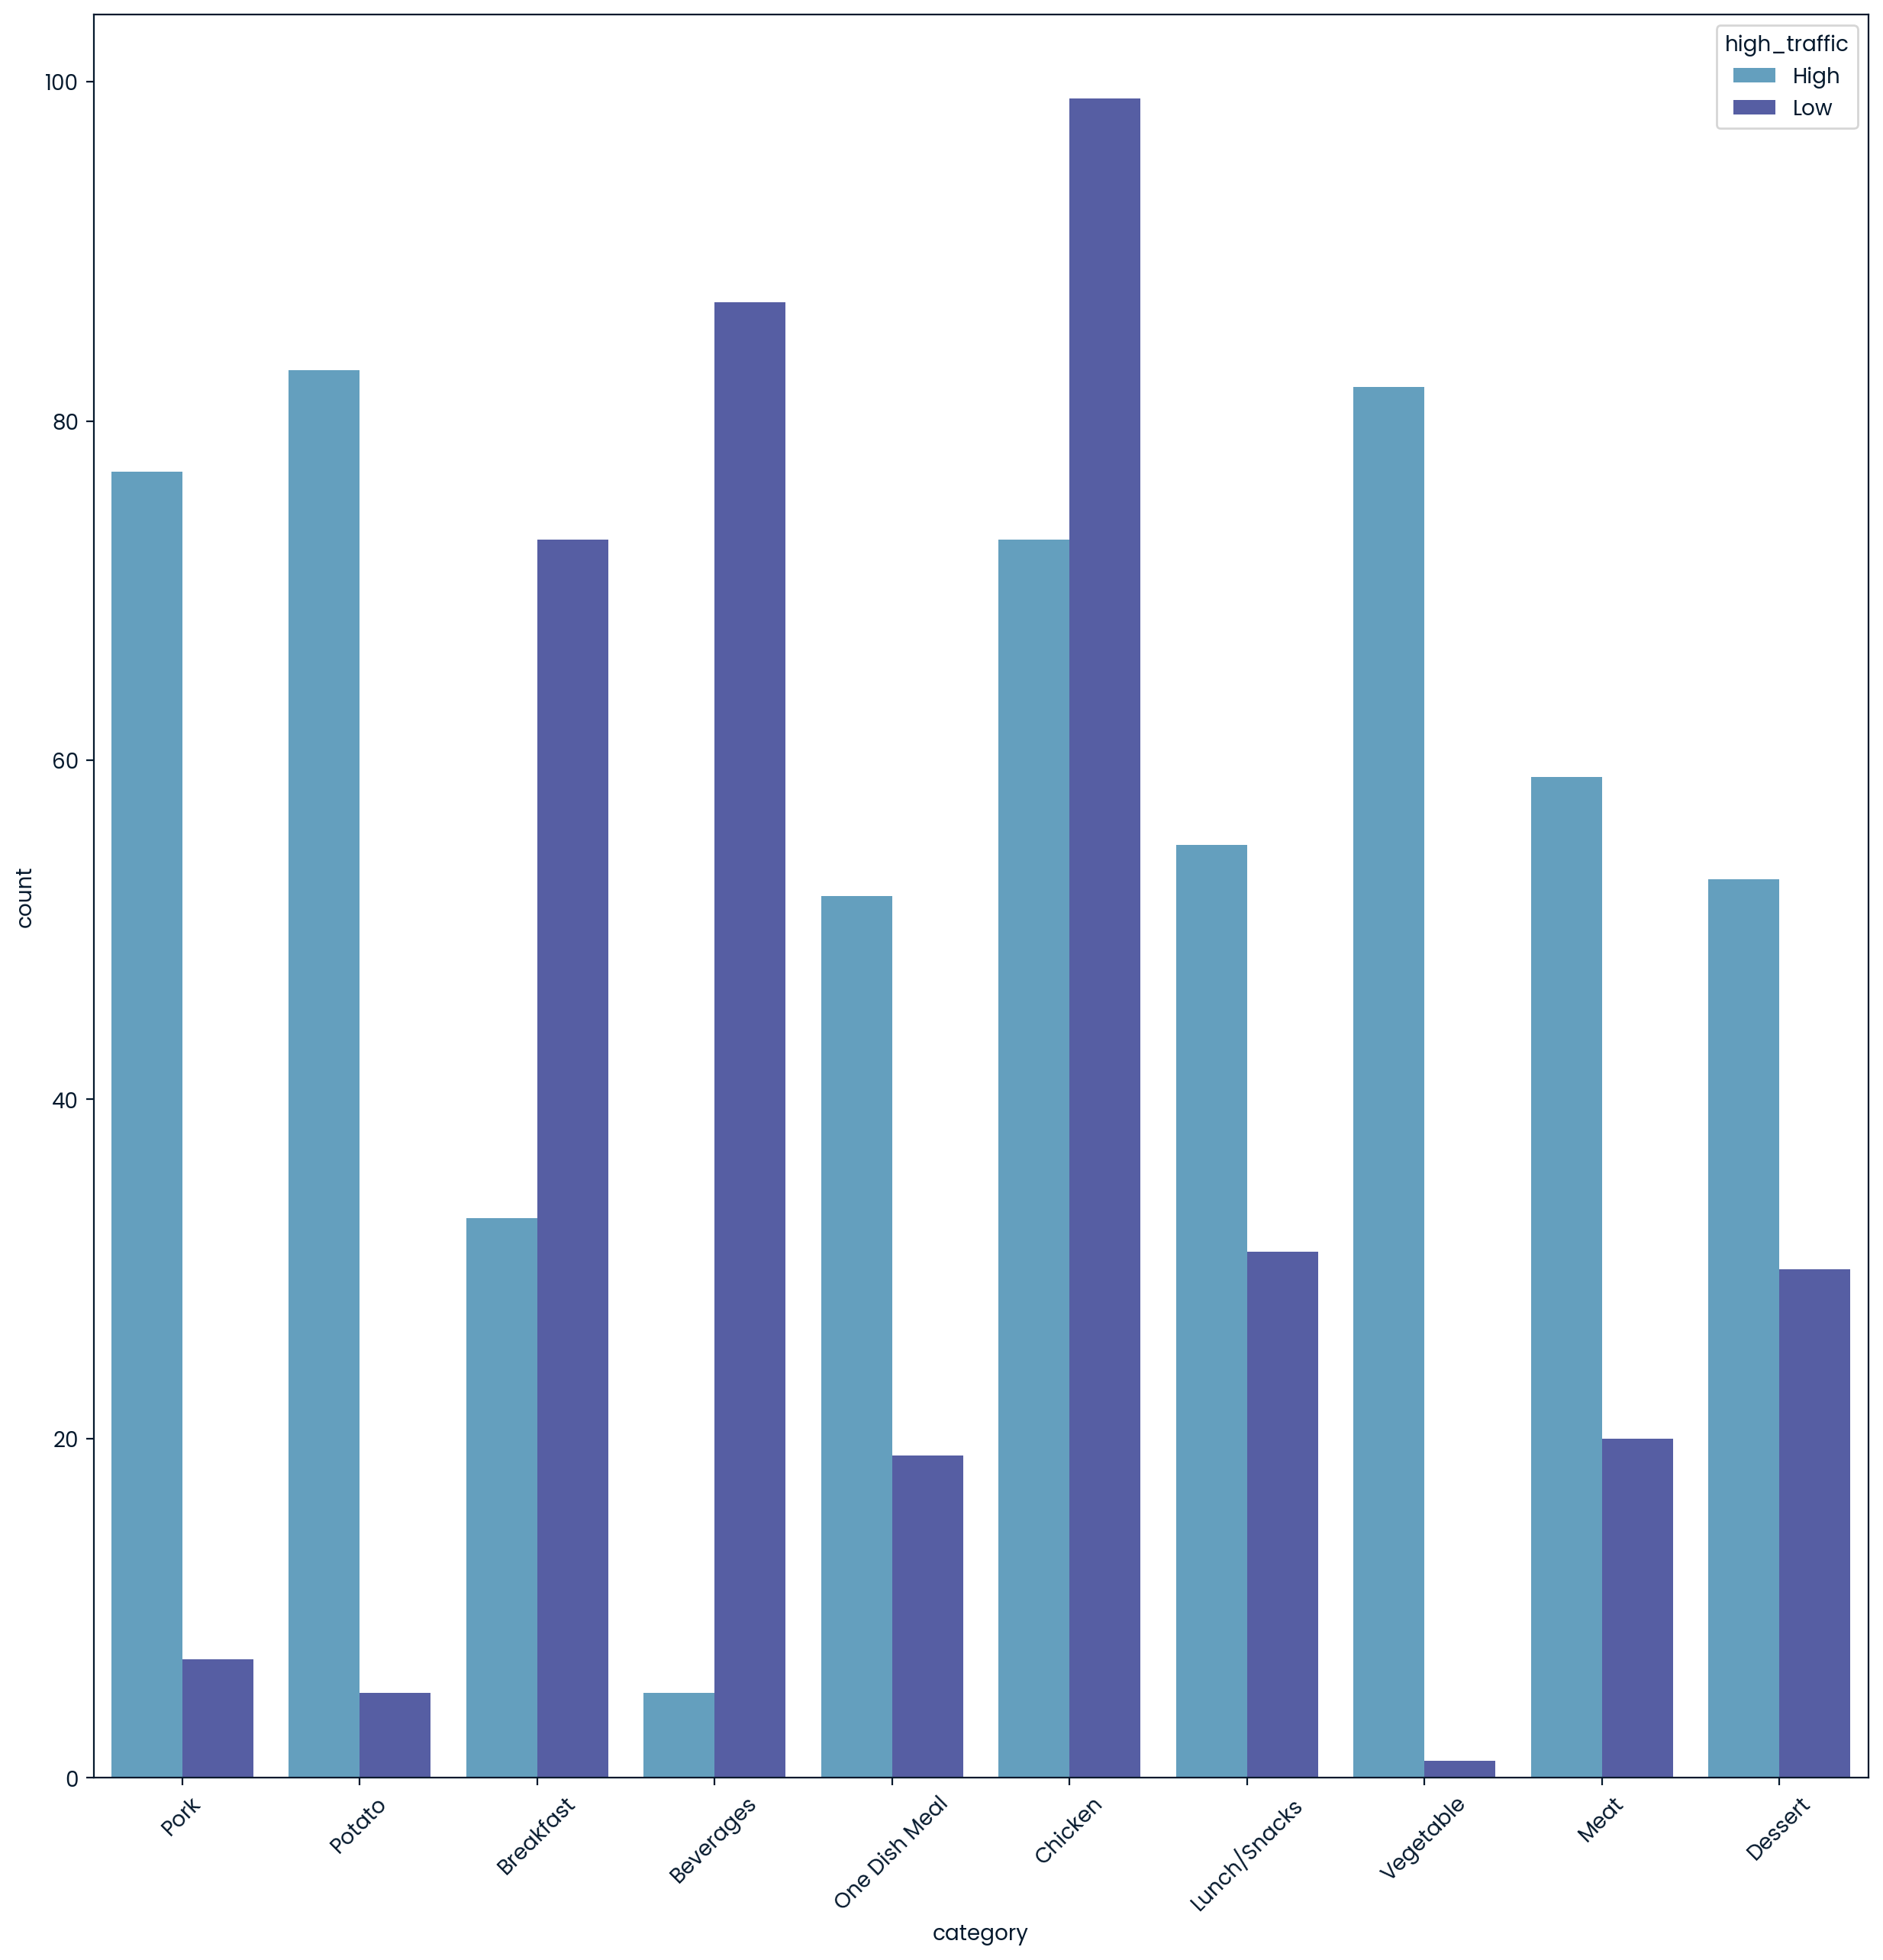

In [64]:
plt.figure(figsize=(15,15))

sns.countplot(x = 'category' , hue = 'high_traffic' , data = df)
plt.xticks(rotation = 45)
plt.show()

<h3> Median Nutrition by Traffic </h3>
For the following graphs, we use the median of the nutritional columns and analyse traffic. This is because the distribution of the dataset is skewed and hence, using the mean cannot be deemed appropriate. Furthermore analyzing the dataset,we see that the general trend is that the higher calories, protien and carbs a recipe has, the higher its traffic. Alternatively, we see that recipes with high sugar tend to have low traffic, indicating that the visitors might be looking for something nutritional and healthy.

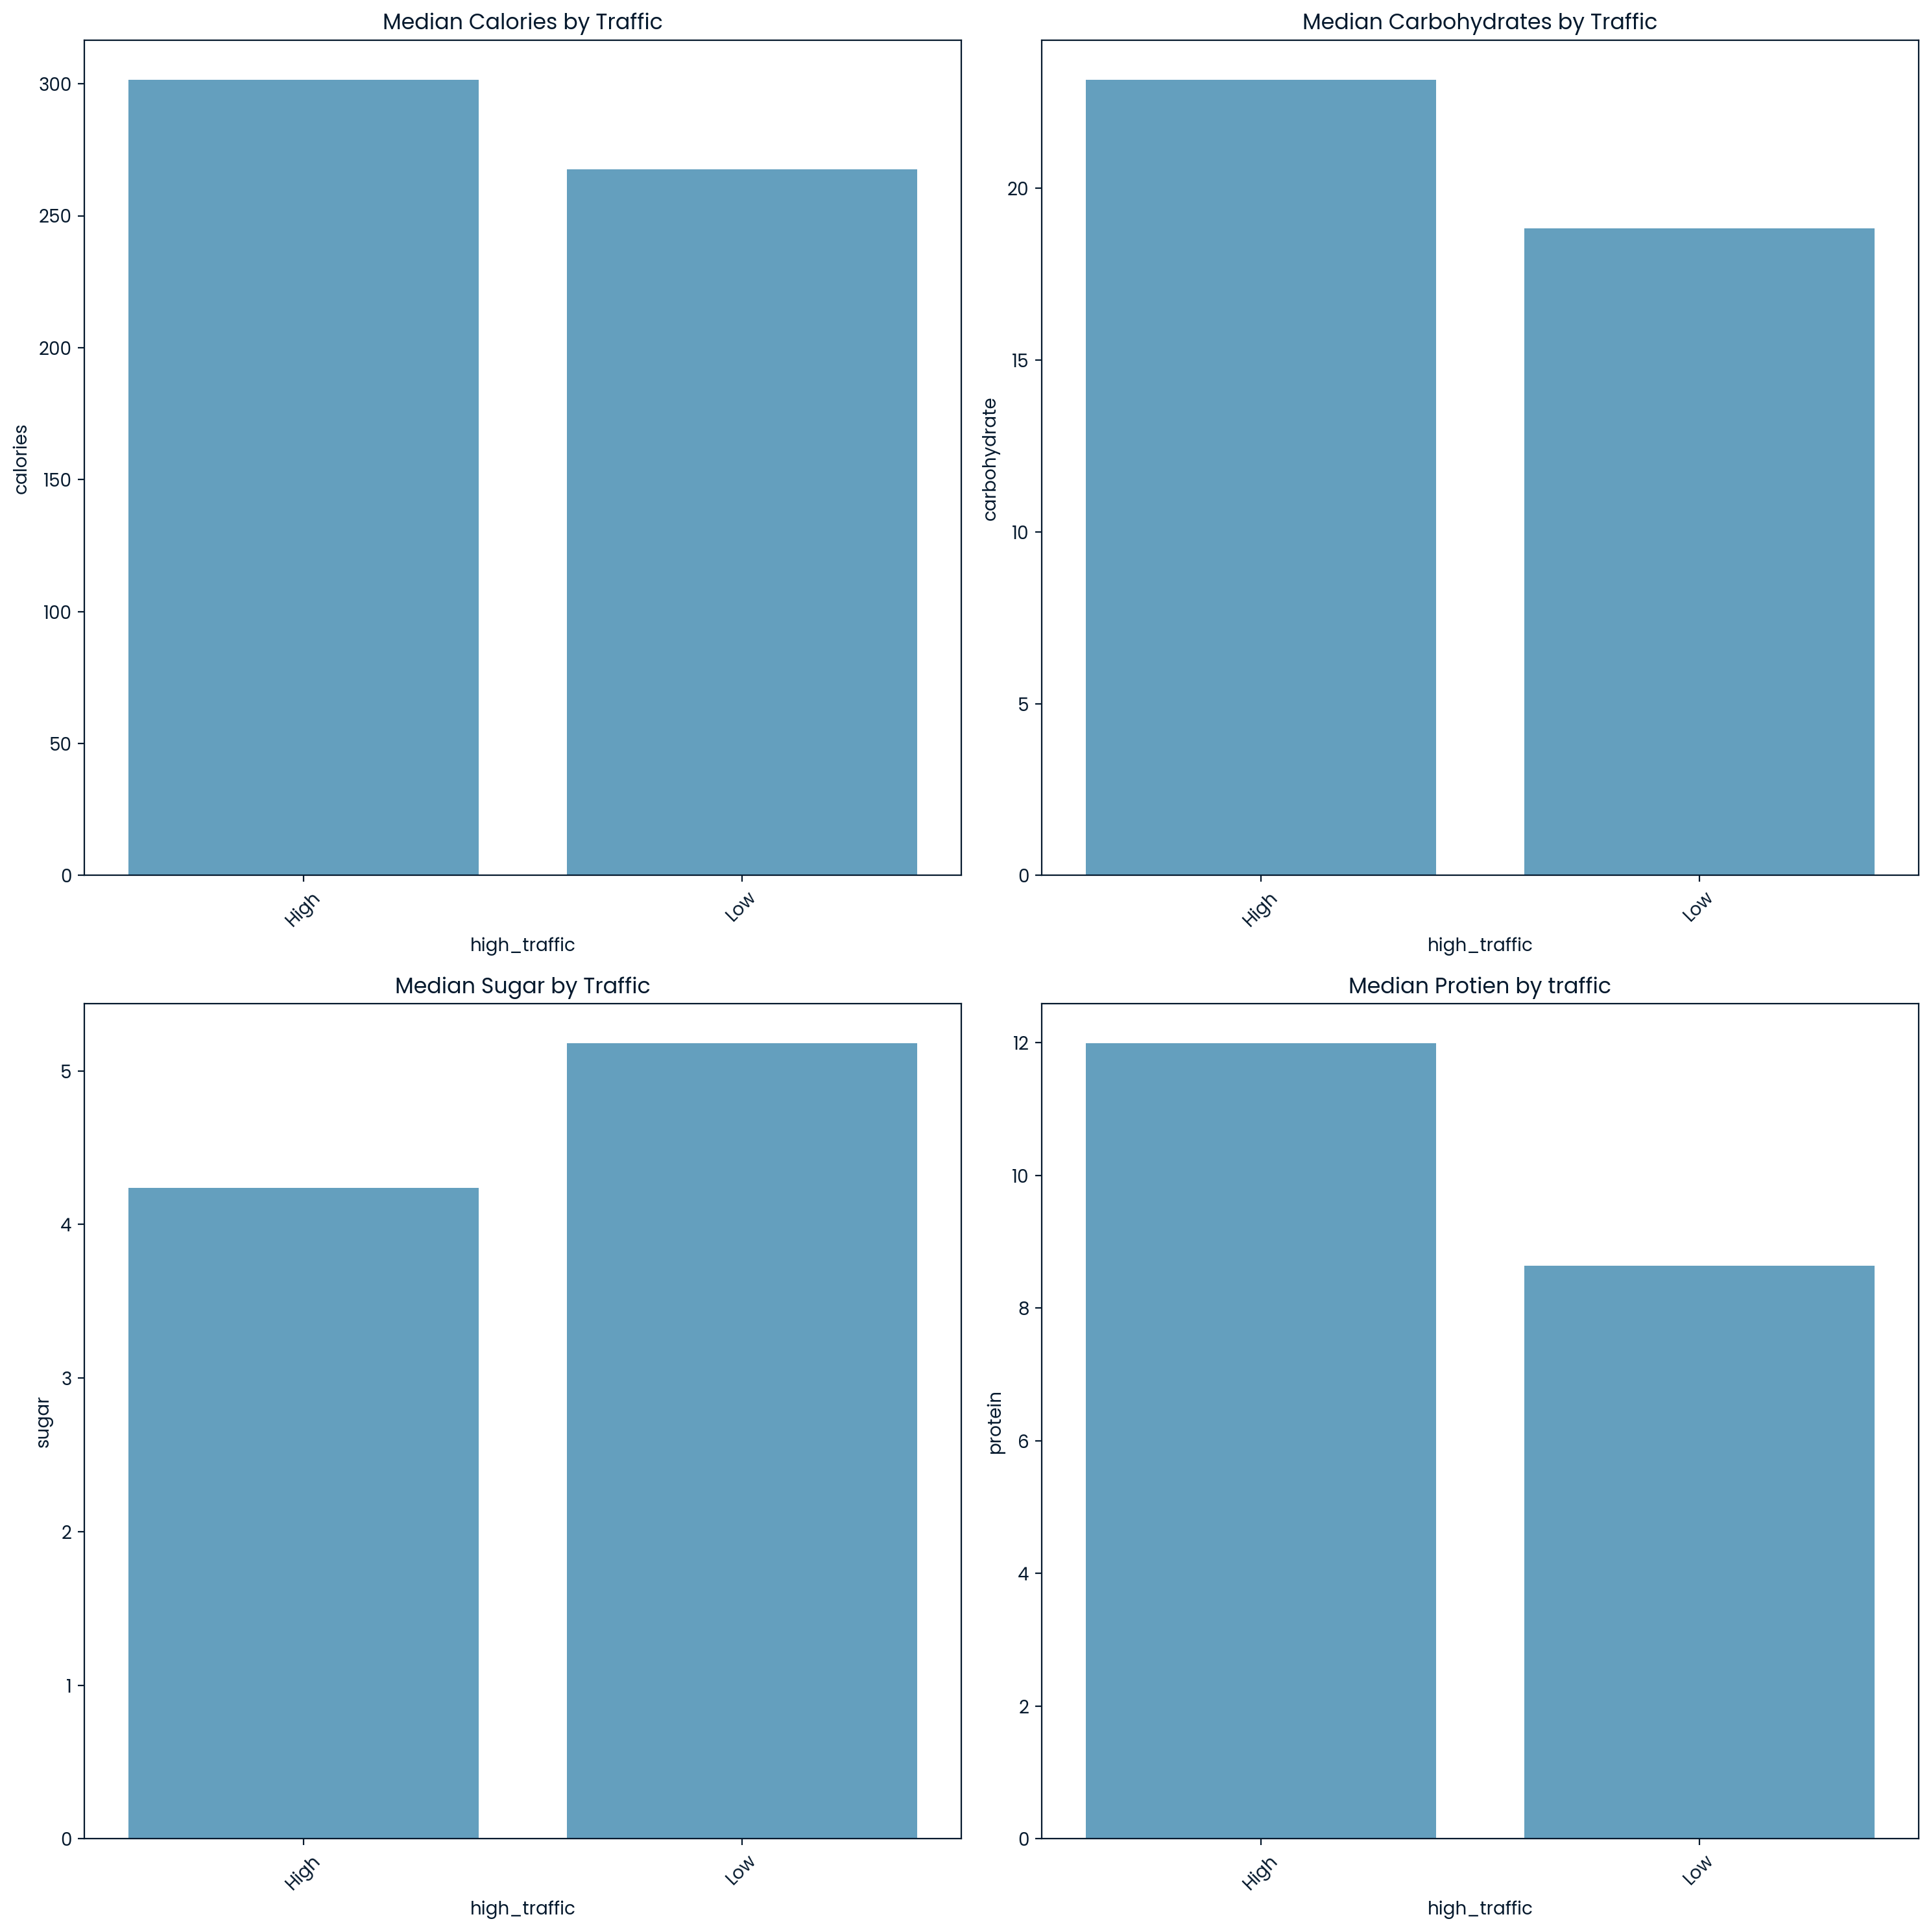

In [65]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

hightrafficmedian = df.groupby('high_traffic')[numericcols].median().reset_index()

sns.barplot(x = 'high_traffic' , y = 'calories' , data = hightrafficmedian  , ax=axs[0, 0])
axs[0, 0].set_title('Median Calories by Traffic')
axs[0, 0].set_xticklabels(axs[0,0].get_xticklabels() , rotation = 45)

sns.barplot(x = 'high_traffic' , y = 'carbohydrate' , data = hightrafficmedian  , ax=axs[0, 1])
axs[0, 1].set_title('Median Carbohydrates by Traffic')
axs[0, 1].set_xticklabels( axs[0,1].get_xticklabels() , rotation = 45)

sns.barplot(x = 'high_traffic' , y = 'sugar' , data = hightrafficmedian  , ax=axs[1, 0])
axs[1, 0].set_title('Median Sugar by Traffic')
axs[1, 0].set_xticklabels( axs[1,0].get_xticklabels() , rotation = 45)

sns.barplot(x = 'high_traffic' , y = 'protein' , data = hightrafficmedian  , ax=axs[1, 1])
axs[1, 1].set_title('Median Protien by traffic')
axs[1, 1].set_xticklabels( axs[1,1].get_xticklabels() , rotation = 45)

plt.tight_layout()
plt.show()

<h3> Median Nuitrition by Category and Traffic </h3>
Carrying forward the trend of analtzing popular/high traffic categories which were vegetable, pork and potato, a deep analysis helps us derive more conclusions. key findings are: <br>
- Although vegetable recipes bring high traffic, those with high protien tend to do the opposite.<br>
- Potato recipes with higher carbs bring more traffic compared to others. <br>
- pork recipes have an almost similar balance between high/low traffic recipes, but we see that pork recipes with less calories and less protien seem to attract more traffic. <br>
- Meat and One Dish meal recipes with the least calories, carbs and most protien are preferred.

<br><br>
The underlying trend which exists can be seen that recipes with lower calories, carbs, sugar and higher protien are preferred, confirming the analysis that the users search for recipes that are healthier and more fullfilling and such recipes attract more traffic.

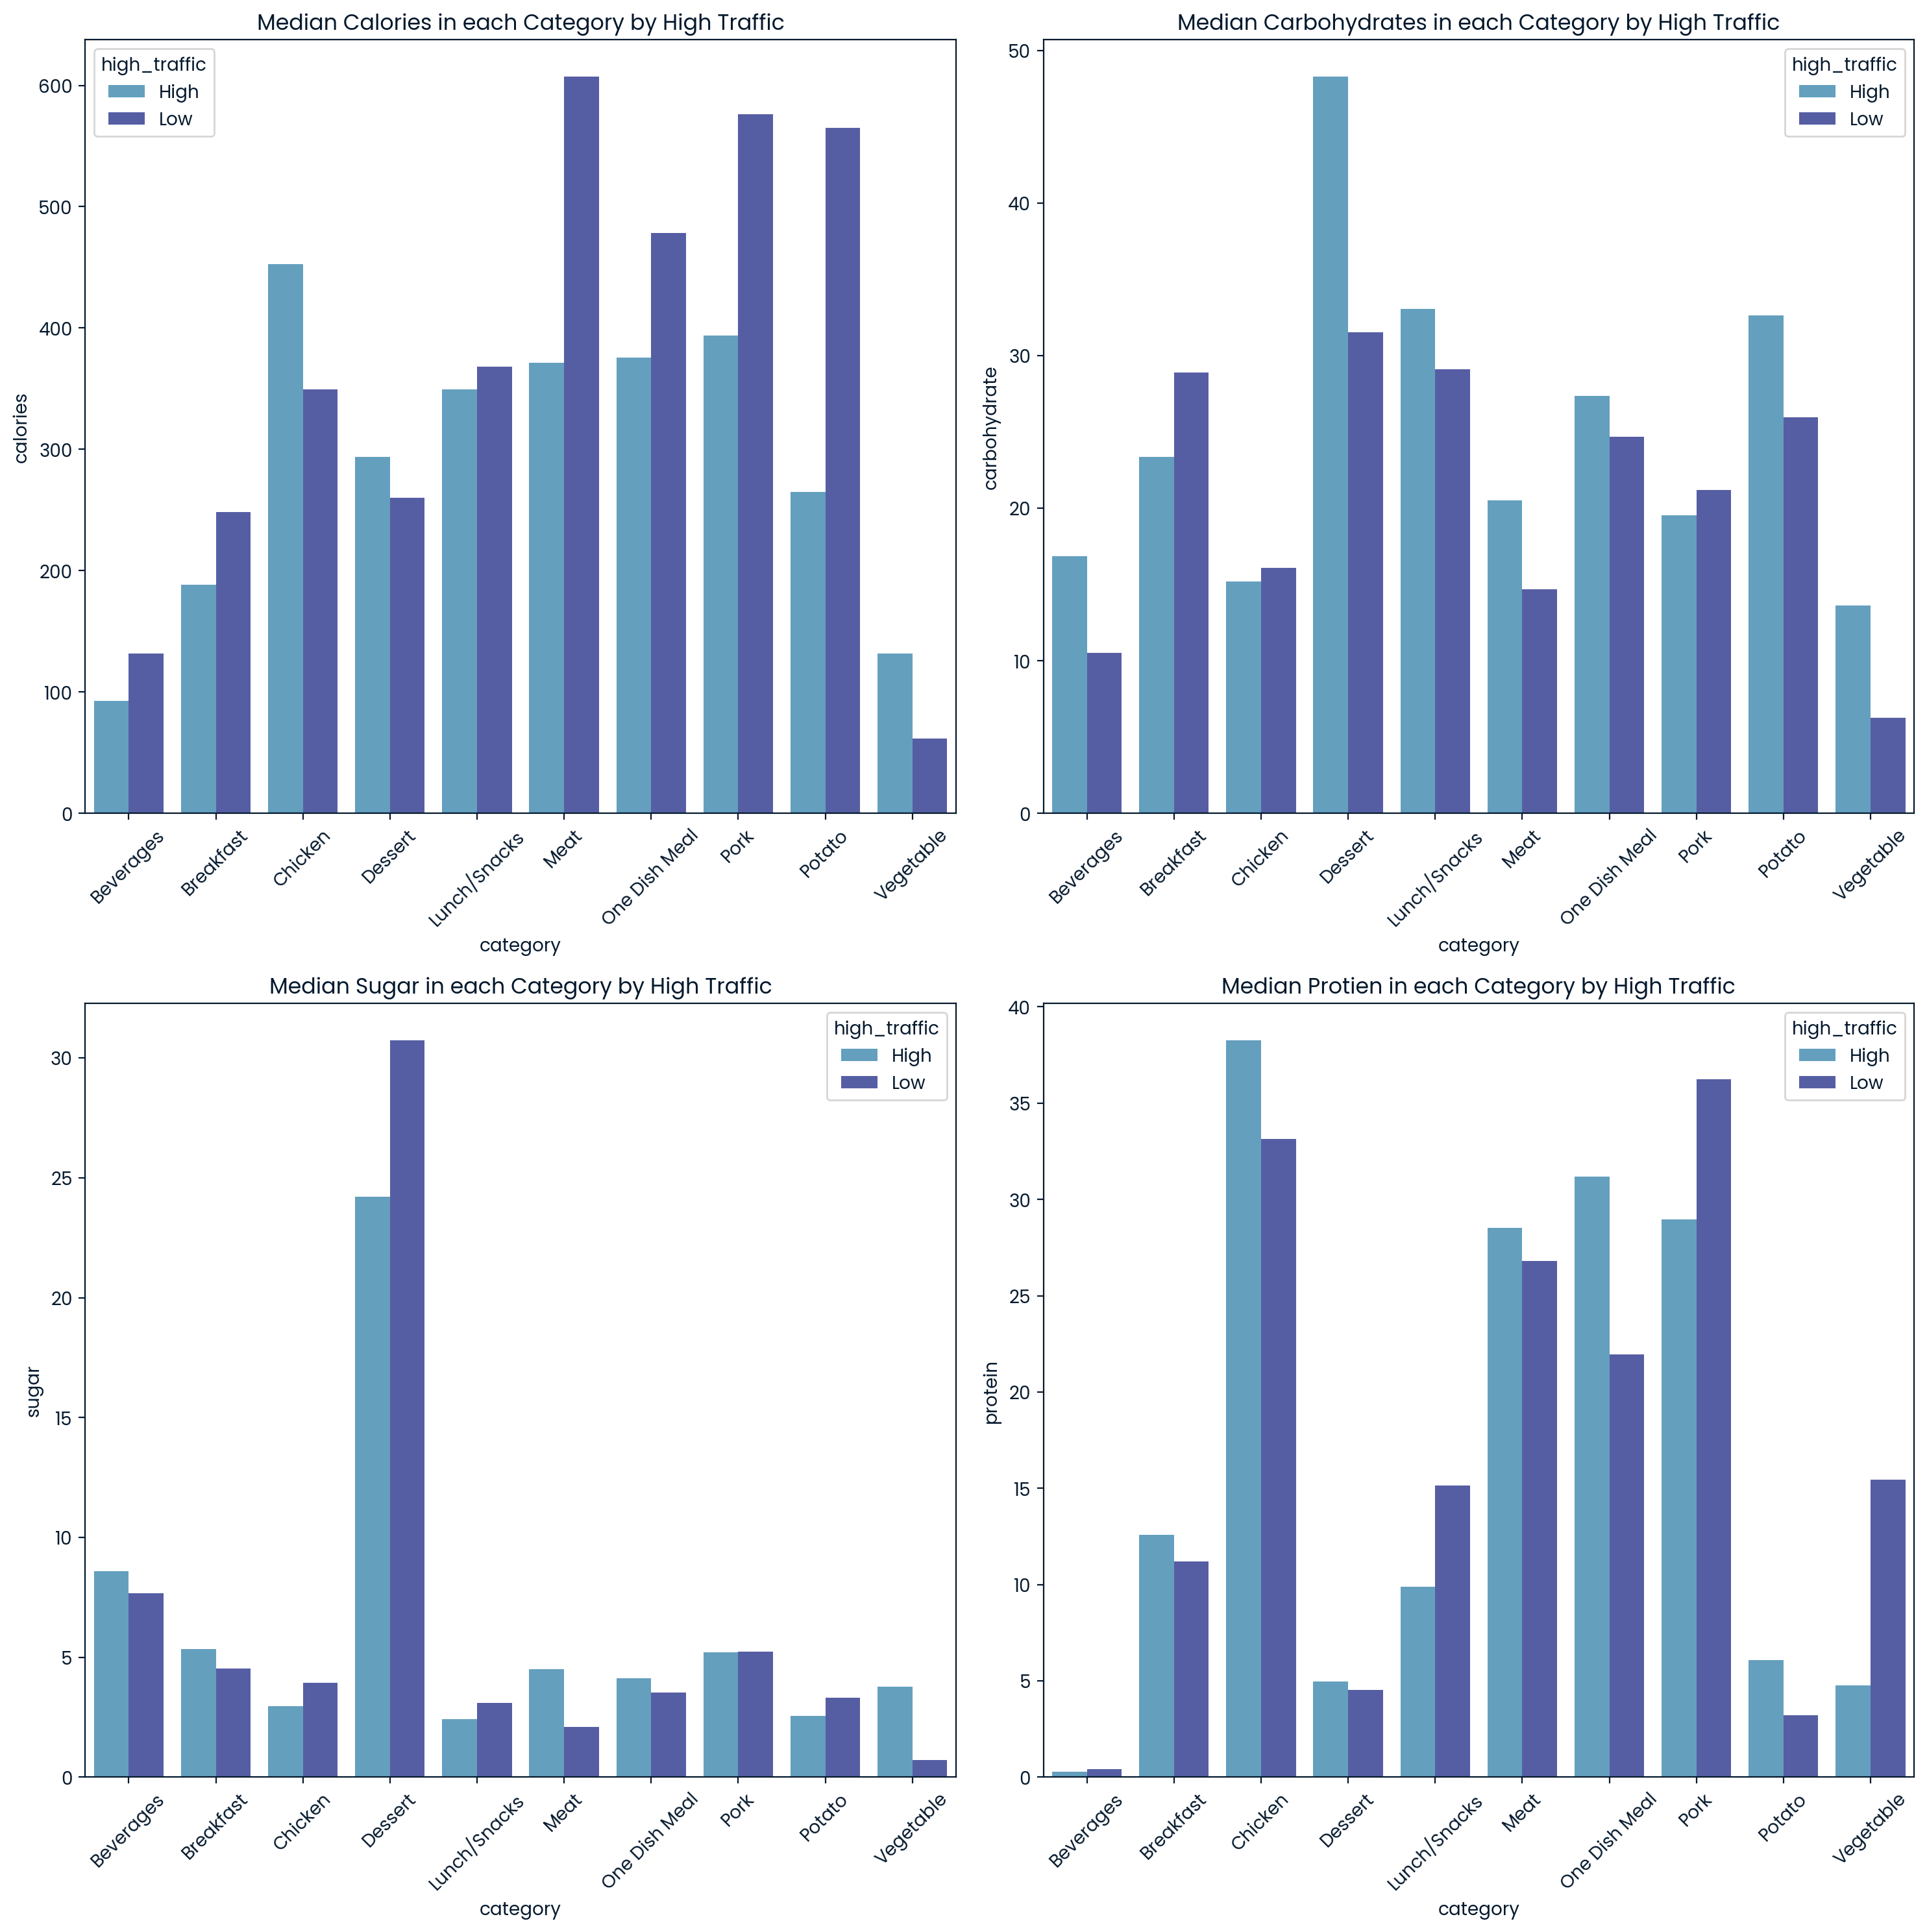

In [66]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

catmedian = df.groupby(['category' , 'high_traffic'])[numericcols].median().reset_index()

sns.barplot(x = 'category' , y = 'calories' , hue = 'high_traffic' , data = catmedian  , ax=axs[0, 0])
axs[0, 0].set_title('Median Calories in each Category by High Traffic')
axs[0, 0].set_xticklabels(axs[0,0].get_xticklabels() , rotation = 45)

sns.barplot(x = 'category' , y = 'carbohydrate' , hue = 'high_traffic' , data = catmedian  , ax=axs[0, 1])
axs[0, 1].set_title('Median Carbohydrates in each Category by High Traffic')
axs[0, 1].set_xticklabels( axs[0,1].get_xticklabels() , rotation = 45)

sns.barplot(x = 'category' , y = 'sugar' , hue = 'high_traffic' ,  data = catmedian  , ax=axs[1, 0])
axs[1, 0].set_title('Median Sugar in each Category by High Traffic')
axs[1, 0].set_xticklabels( axs[1,0].get_xticklabels() , rotation = 45)

sns.barplot(x = 'category' , y = 'protein' , hue = 'high_traffic' , data = catmedian  , ax=axs[1, 1])
axs[1, 1].set_title('Median Protien in each Category by High Traffic')
axs[1, 1].set_xticklabels( axs[1,1].get_xticklabels() , rotation = 45)

plt.tight_layout()
plt.show()

<h3> Median Nutrition by Servings </h3>
Analyzing the nutritional aspects along with servings, we see that the overall trend remains the same. recipes 

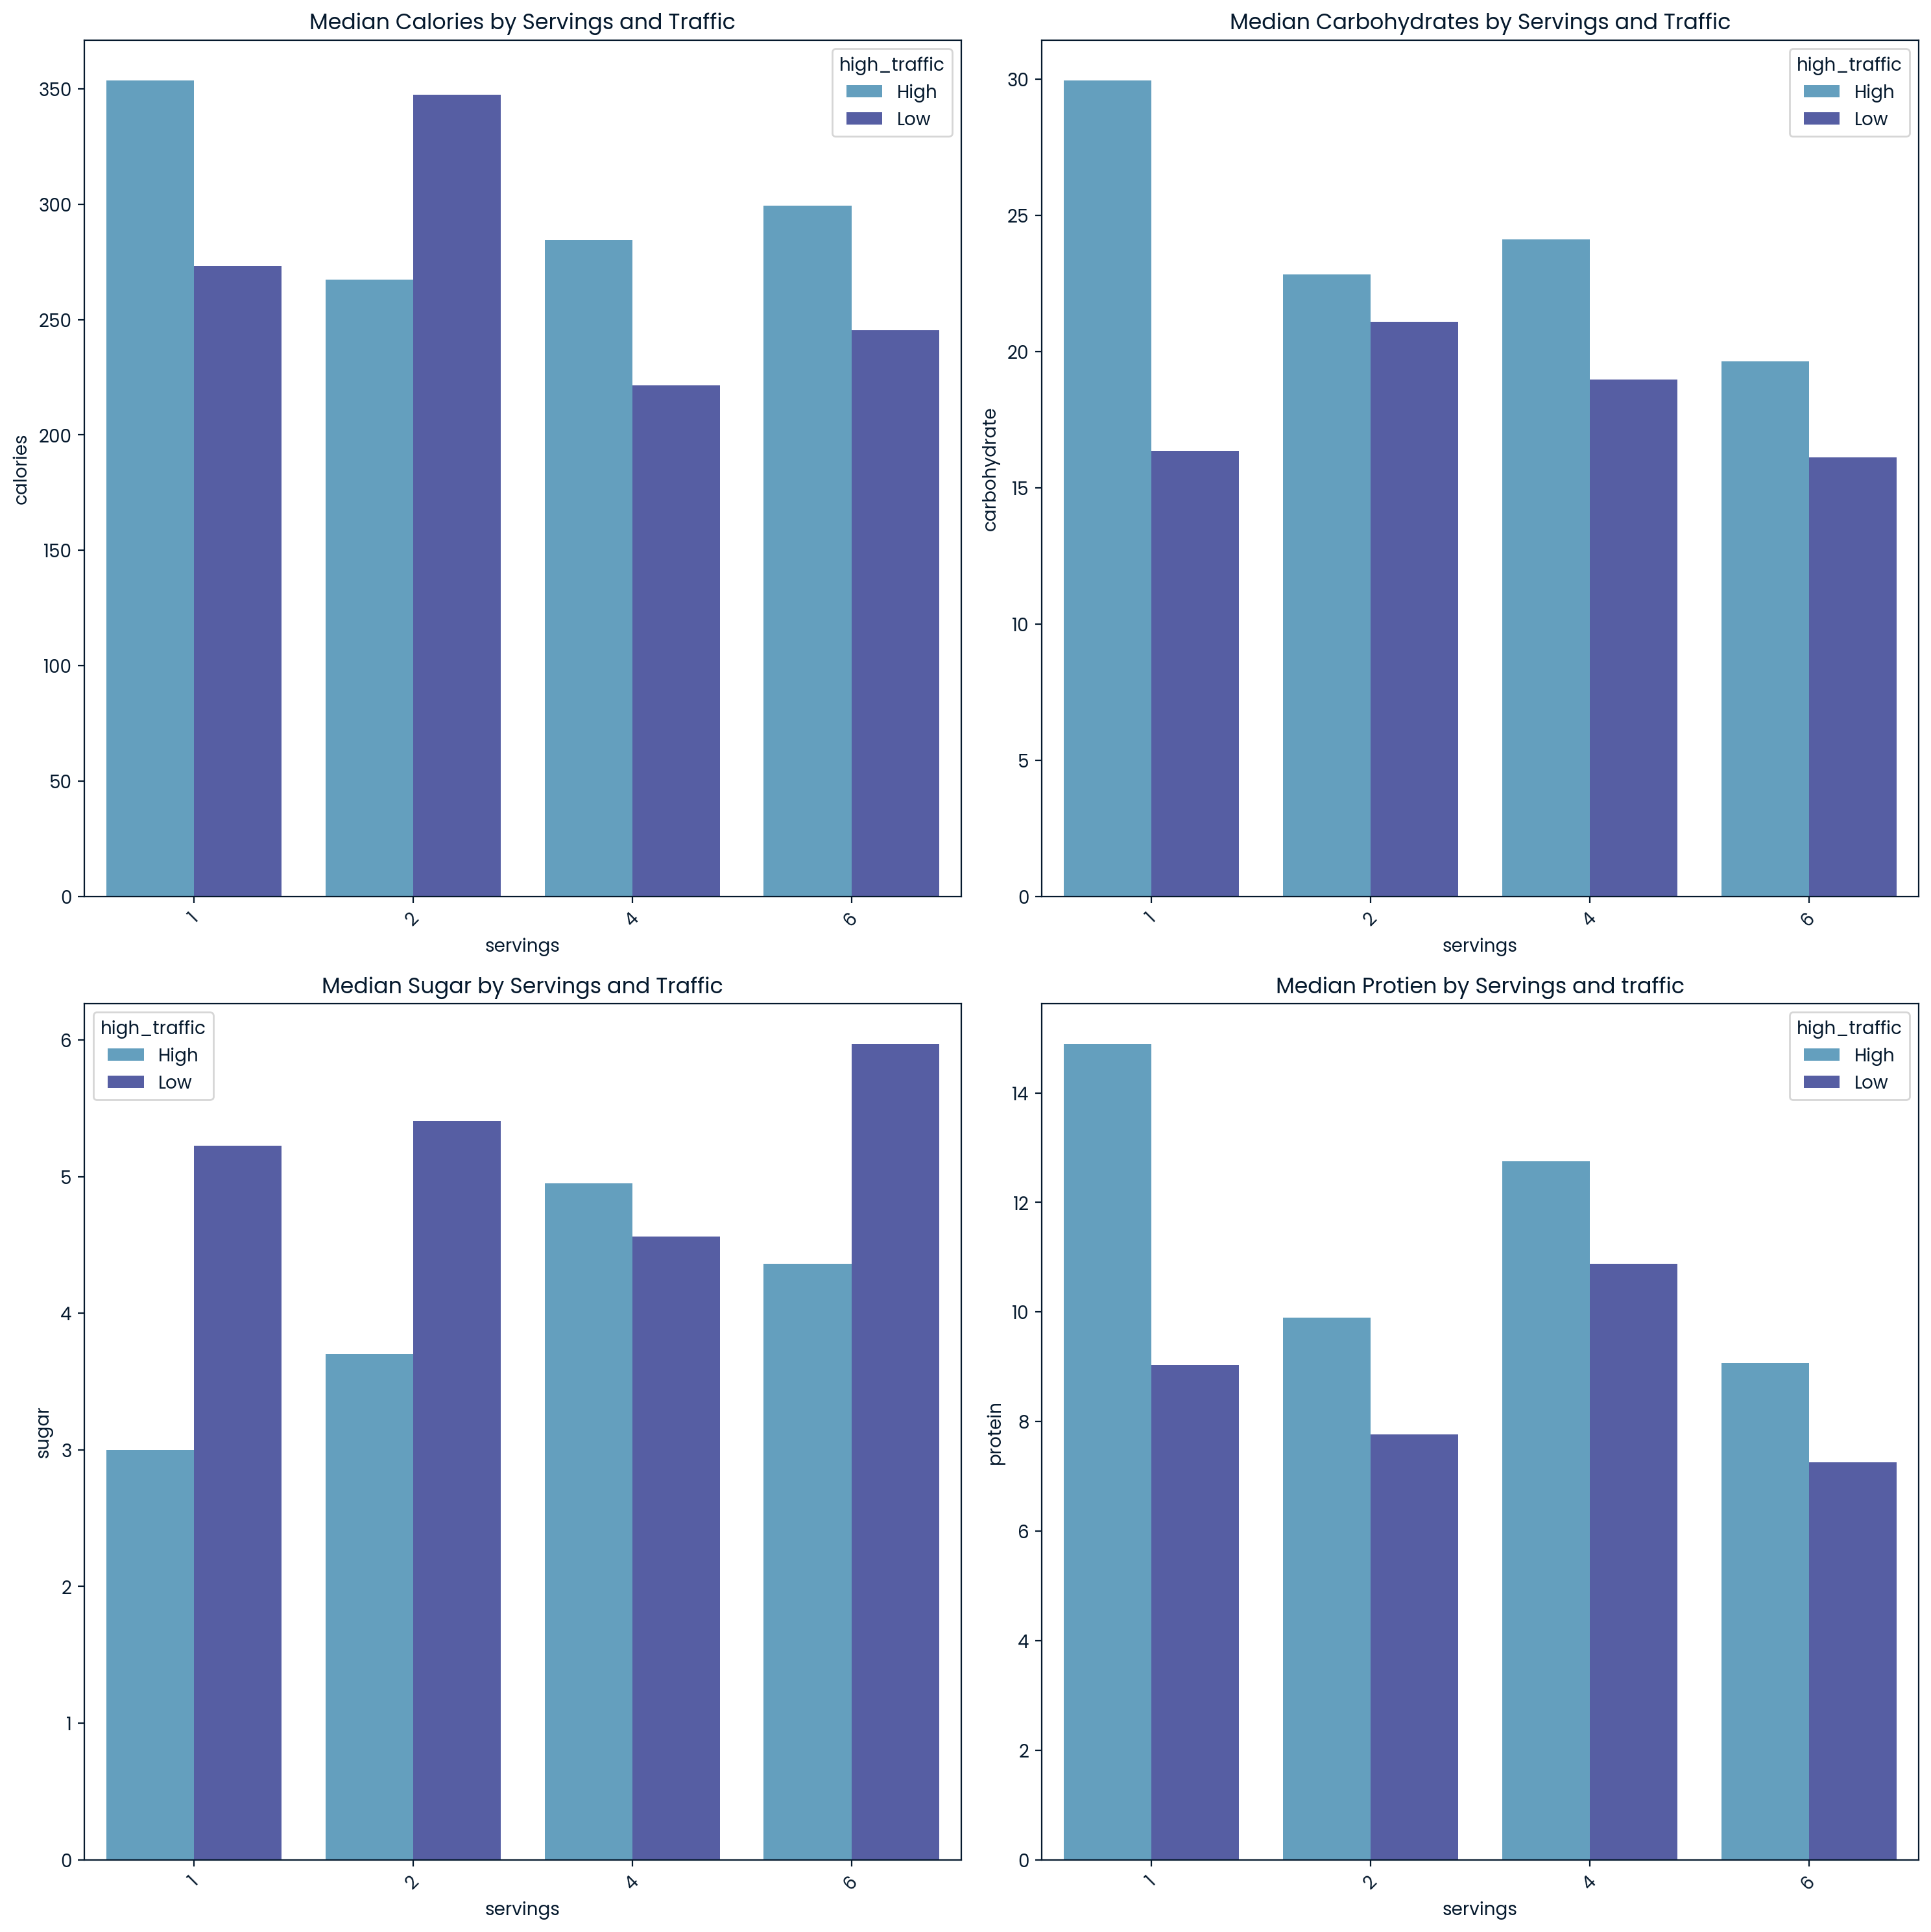

In [67]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

servingsmedian = df.groupby(['servings', 'high_traffic'])[numericcols].median().reset_index()

sns.barplot(x = 'servings' , y = 'calories' , hue = 'high_traffic' , data = servingsmedian  , ax=axs[0, 0])
axs[0, 0].set_title('Median Calories by Servings and Traffic')
axs[0, 0].set_xticklabels(axs[0,0].get_xticklabels() , rotation = 45)

sns.barplot(x = 'servings' , y = 'carbohydrate' , hue = 'high_traffic' , data = servingsmedian  , ax=axs[0, 1])
axs[0, 1].set_title('Median Carbohydrates by Servings and Traffic')
axs[0, 1].set_xticklabels( axs[0,1].get_xticklabels() , rotation = 45)

sns.barplot(x = 'servings' , y = 'sugar' , hue = 'high_traffic' , data = servingsmedian  , ax=axs[1, 0])
axs[1, 0].set_title('Median Sugar by Servings and Traffic')
axs[1, 0].set_xticklabels( axs[1,0].get_xticklabels() , rotation = 45)

sns.barplot(x = 'servings' , y = 'protein' , hue = 'high_traffic' , data = servingsmedian , ax=axs[1, 1])
axs[1, 1].set_title('Median Protien by Servings and traffic')
axs[1, 1].set_xticklabels( axs[1,1].get_xticklabels() , rotation = 45)

plt.tight_layout()
plt.show()

<h3> Pairplot </h3>
Lastly, we plot a pairplot to see any significant correlations between any columns. We can see that there isnt much correlation between the nurtitional values. We can also confirm again, that the nutritional values are skewed to the right.

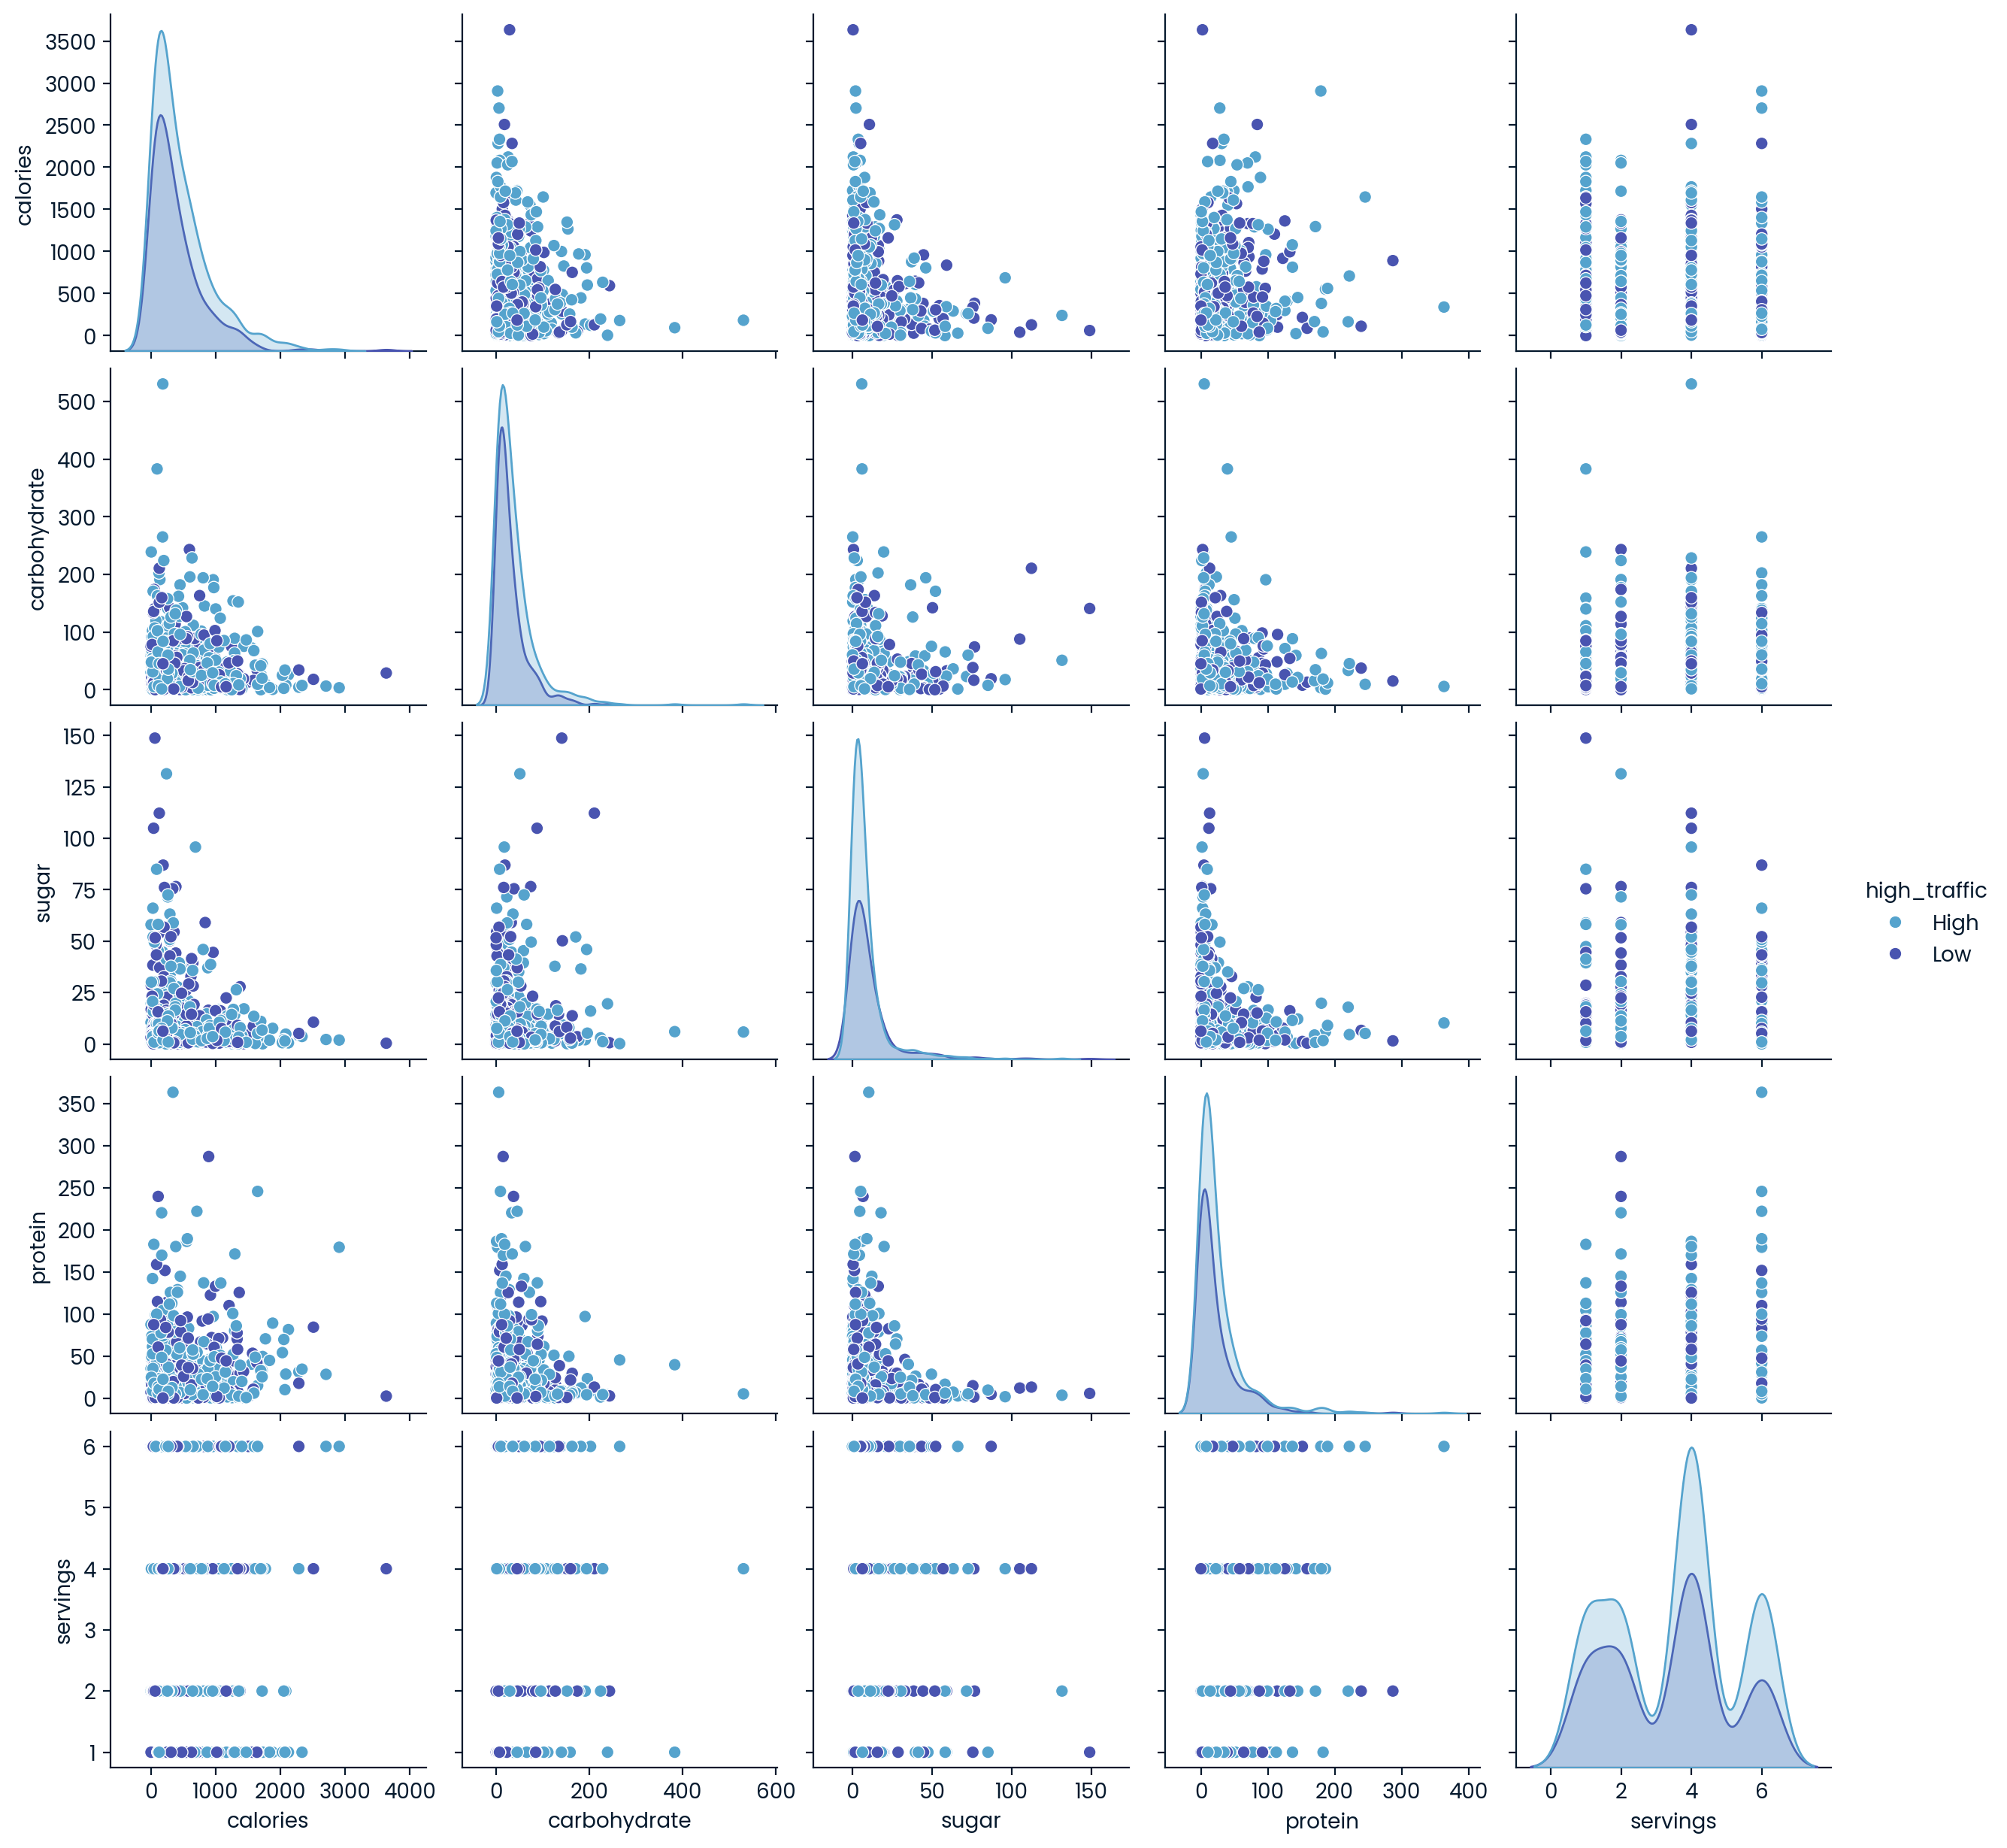

In [68]:
sns.pairplot(df , hue = 'high_traffic')
plt.show()

<h2> Data Preprocessing </h2>
We now perform data preprocessing, where we convert the data into formats which can be fed to an algorithm to make predictions. 

<h3> Filling Missing Values </h3>
Firstly, we fill the missing values in the data. We use SimpleImputer from sklearn which replaces null values. We replace the values with the median as the data is skewed which greatly affects the mean. Hence it is not appropriate to use.

In [69]:
imputer = SimpleImputer(strategy = 'median')

#imputing numerical columns
for col in numericcols:
    df[col] = imputer.fit_transform(df[col].values.reshape(-1,1))
    df[col] = df[col].round(2)

df.isna().sum()

calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

<h3> Winsorizing Outliers </h3>
we deal with the outliers by winsorizing the data. Winsorizing refers to limiting/capping the outliers so that they do not affect our dataset too much. Below, we redraw the histogram to see its effects on the dataset. As seen, the data now has a limiter where any value above a certain threshold is capped.

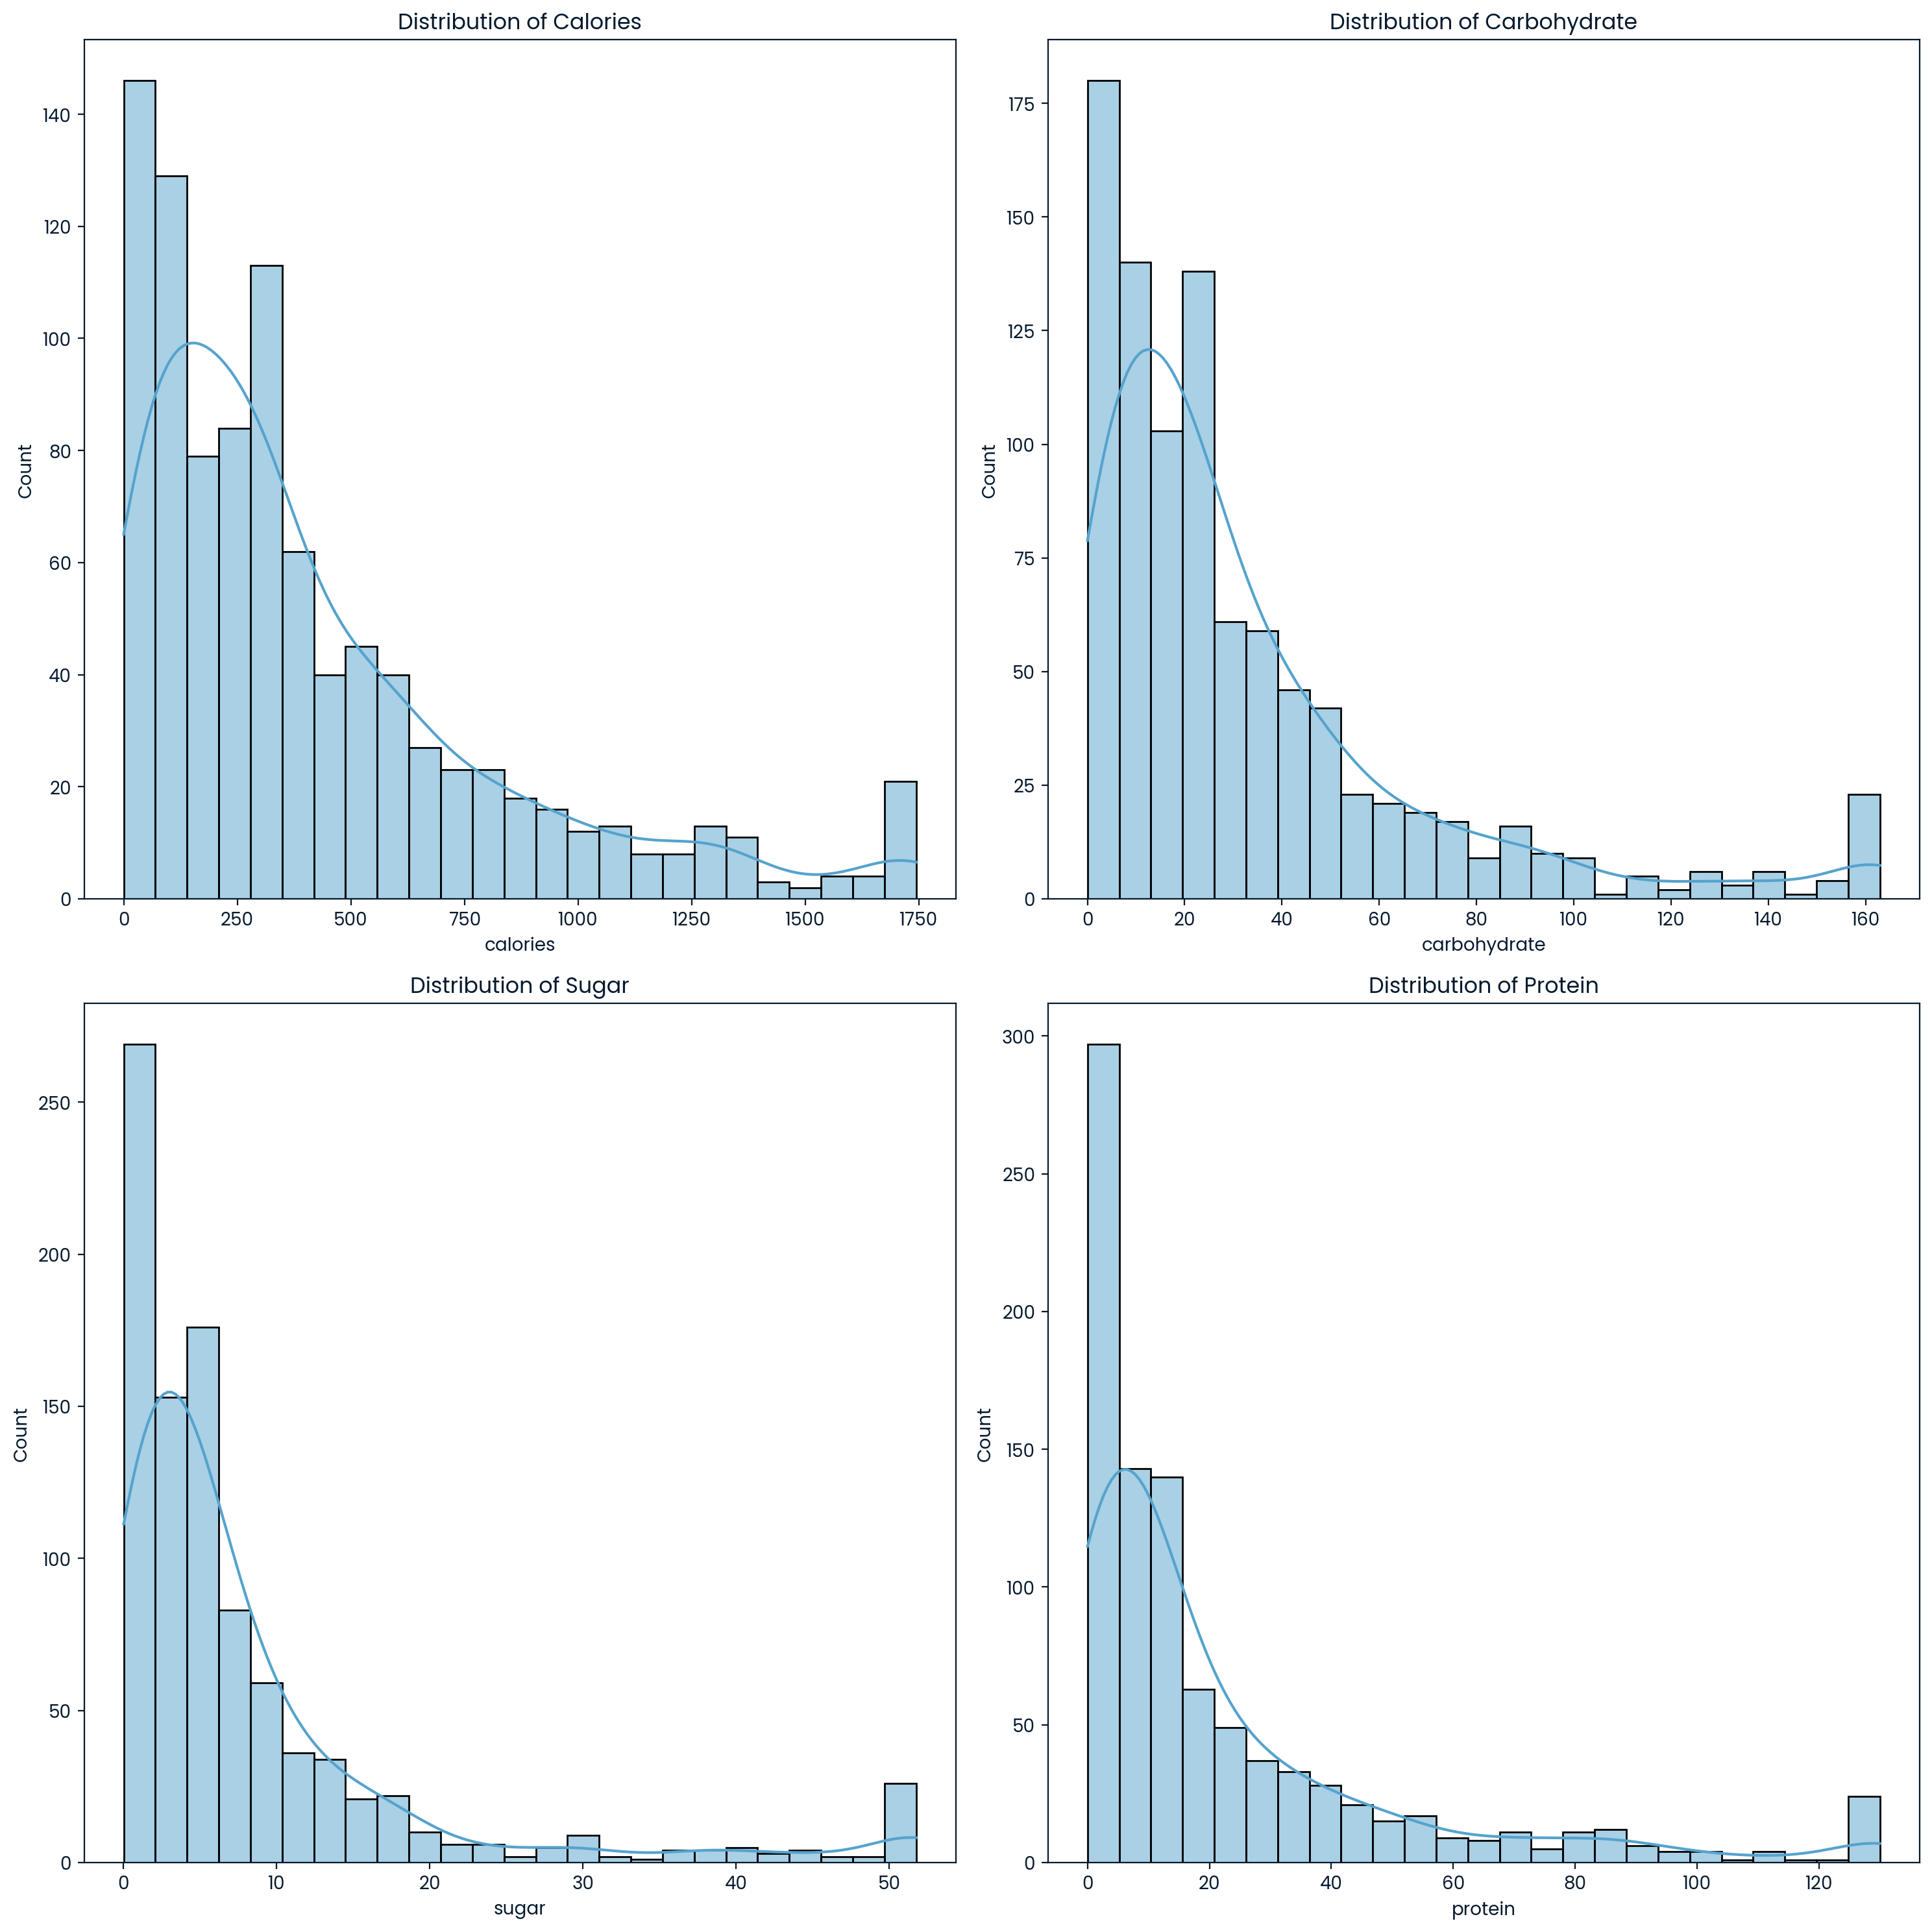

In [70]:
winsor = Winsorizer(capping_method='gaussian', tail='right', fold=3, variables=numericcols)

#winsorizing the numrical columns
df[numericcols] = winsor.fit_transform(df[numericcols])

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

sns.histplot(x = 'calories' , data = df , ax=axs[0, 0] , kde = True , bins = 25)
axs[0, 0].set_title('Distribution of Calories')

sns.histplot(x = 'carbohydrate', data = df , ax=axs[0, 1] , kde = True , bins = 25)
axs[0, 1].set_title('Distribution of Carbohydrate')

sns.histplot(x = 'sugar', data = df ,ax=axs[1, 0] , kde = True , bins = 25)
axs[1, 0].set_title('Distribution of Sugar')

sns.histplot(x = 'protein', data = df , ax=axs[1, 1] , kde = True , bins = 25)
axs[1, 1].set_title('Distribution of Protein')

plt.tight_layout()
plt.show()

<h3> Transforming Numerical Variables </h3>
We now transform the numeric variables to have a better and an even distribution. This is because skewed data can often lead to bias and cause the model to not generalize well on unseen data. Hence we use the PowerTransformer by sklearn to transform the data. the default method is 'yeo johnson' which is appropriate for the dataset.

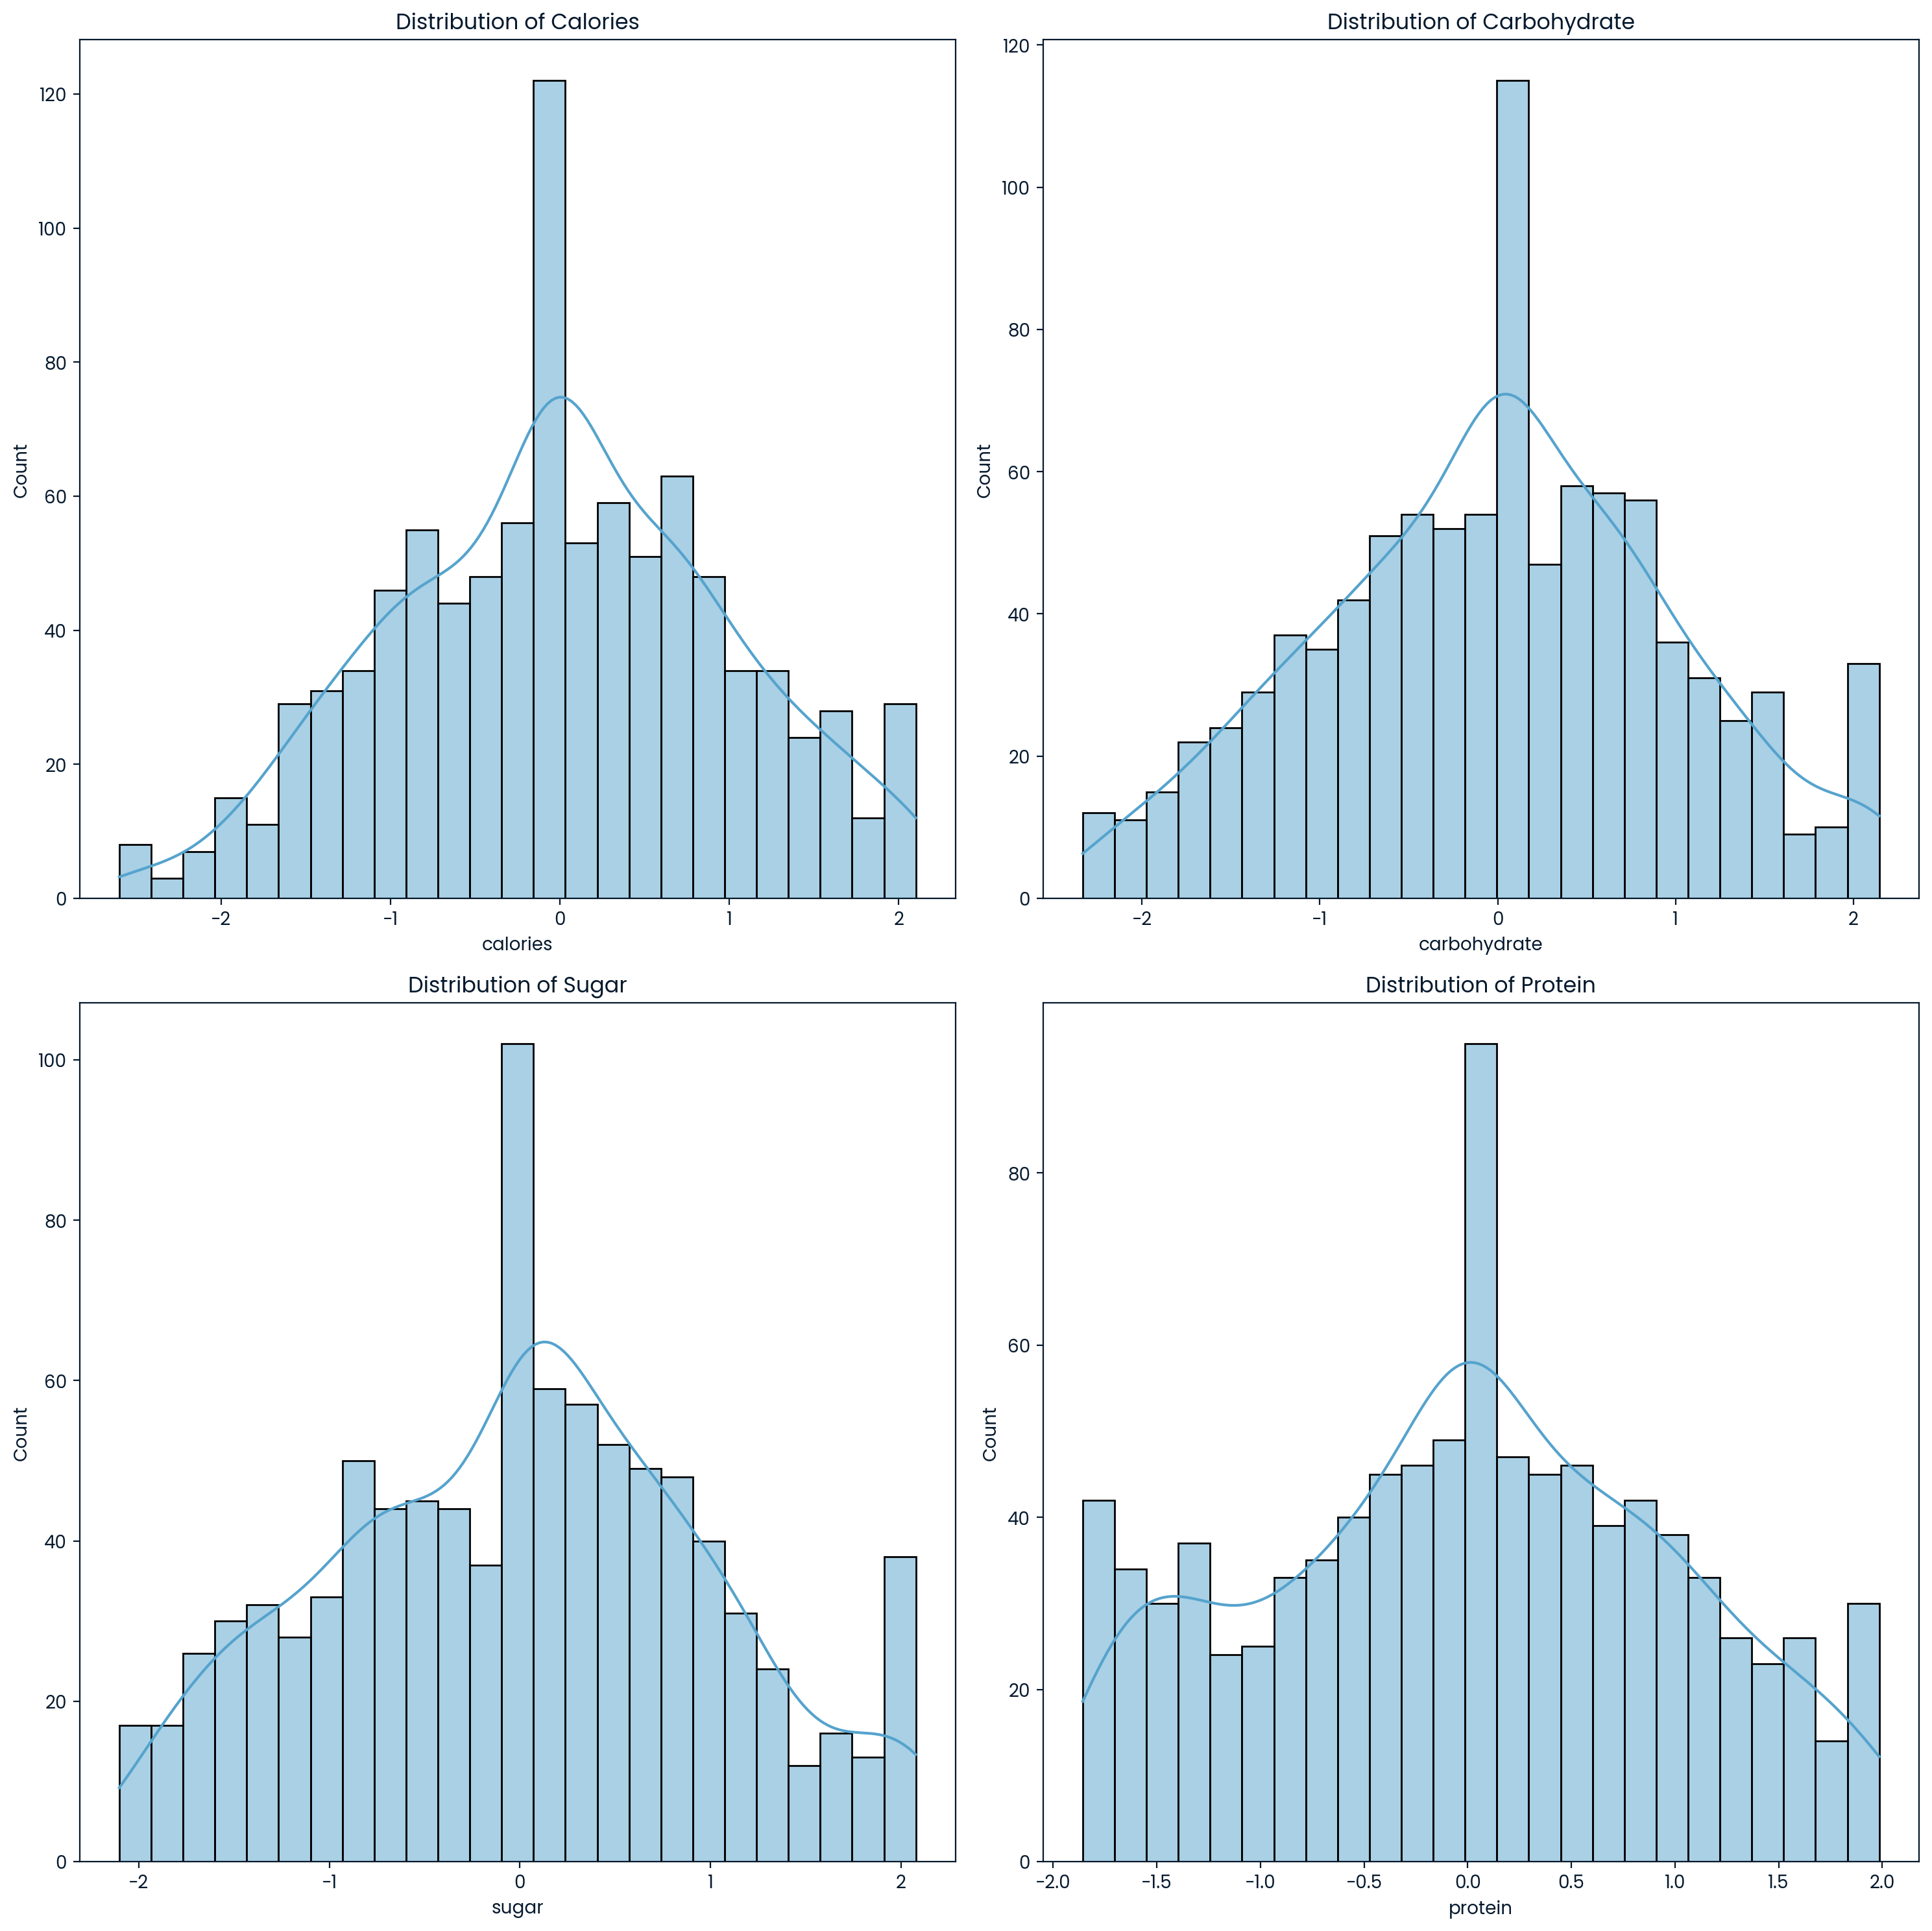

In [71]:
trans = PowerTransformer()

#using yeo-johnson transformer
df[numericcols] = trans.fit_transform(df[numericcols])

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

sns.histplot(x = 'calories' , data = df , ax=axs[0, 0] , kde = True , bins = 25)
axs[0, 0].set_title('Distribution of Calories')

sns.histplot(x = 'carbohydrate', data = df , ax=axs[0, 1] , kde = True , bins = 25)
axs[0, 1].set_title('Distribution of Carbohydrate')

sns.histplot(x = 'sugar', data = df ,ax=axs[1, 0] , kde = True , bins = 25)
axs[1, 0].set_title('Distribution of Sugar')

sns.histplot(x = 'protein', data = df , ax=axs[1, 1] , kde = True , bins = 25)
axs[1, 1].set_title('Distribution of Protein')

plt.tight_layout()
plt.show()

<h3> Converting Categorical Variables </h3>
Next, we convert the categorical variables into something more interpretable by the machine learning algorithm. We firstly map the 'High' traffic recipes to 1, indicating that we have correctly predicted and 0 for 'Low' indicating we have not predicted correctly.<br><br> 

For the category column, we use the get_dummies method by pandas, which converts each column into boolean. This is interpreted as 'True' if the recipe belongs to that category and false otherwise. LabelEncoder was not used as it defines unique integers to the category which can introduce an ordinal relationship.

In [72]:
mapping = {'High' : 1 , 'Low' : 0}

#mapping high traffic to integer
df['high_traffic'] = df['high_traffic'].map(mapping)

#creating dummies
cats_dummies = pd.get_dummies(df['category'])

df = pd.concat([df , cats_dummies] , axis = 1)

df.drop('category' , axis = 1 , inplace = True)
df.head()

calories  carbohydrate     sugar  ...   Pork  Potato  Vegetable
0  0.001738      0.026850  0.051480  ...   True   False      False
1 -1.432657      0.573999 -1.406238  ...  False    True      False
2  1.229783      0.674195 -0.287238  ...  False   False      False
3 -0.845015      0.350362  1.862073  ...  False   False      False
4 -1.564277     -1.657961 -1.298420  ...  False   False      False

[5 rows x 16 columns]

<h3> Correlation heatmap </h3>
We use a correaltion heatmap now to better understand what effects traffic the most. As seen, the categories pork, potato and vegetable have a positive correlation with traffic. These categories are important. On the other hand, categories like beverages and breakfast have a negative correlation, meaning that these recipes should be as low as possible, or be removed.

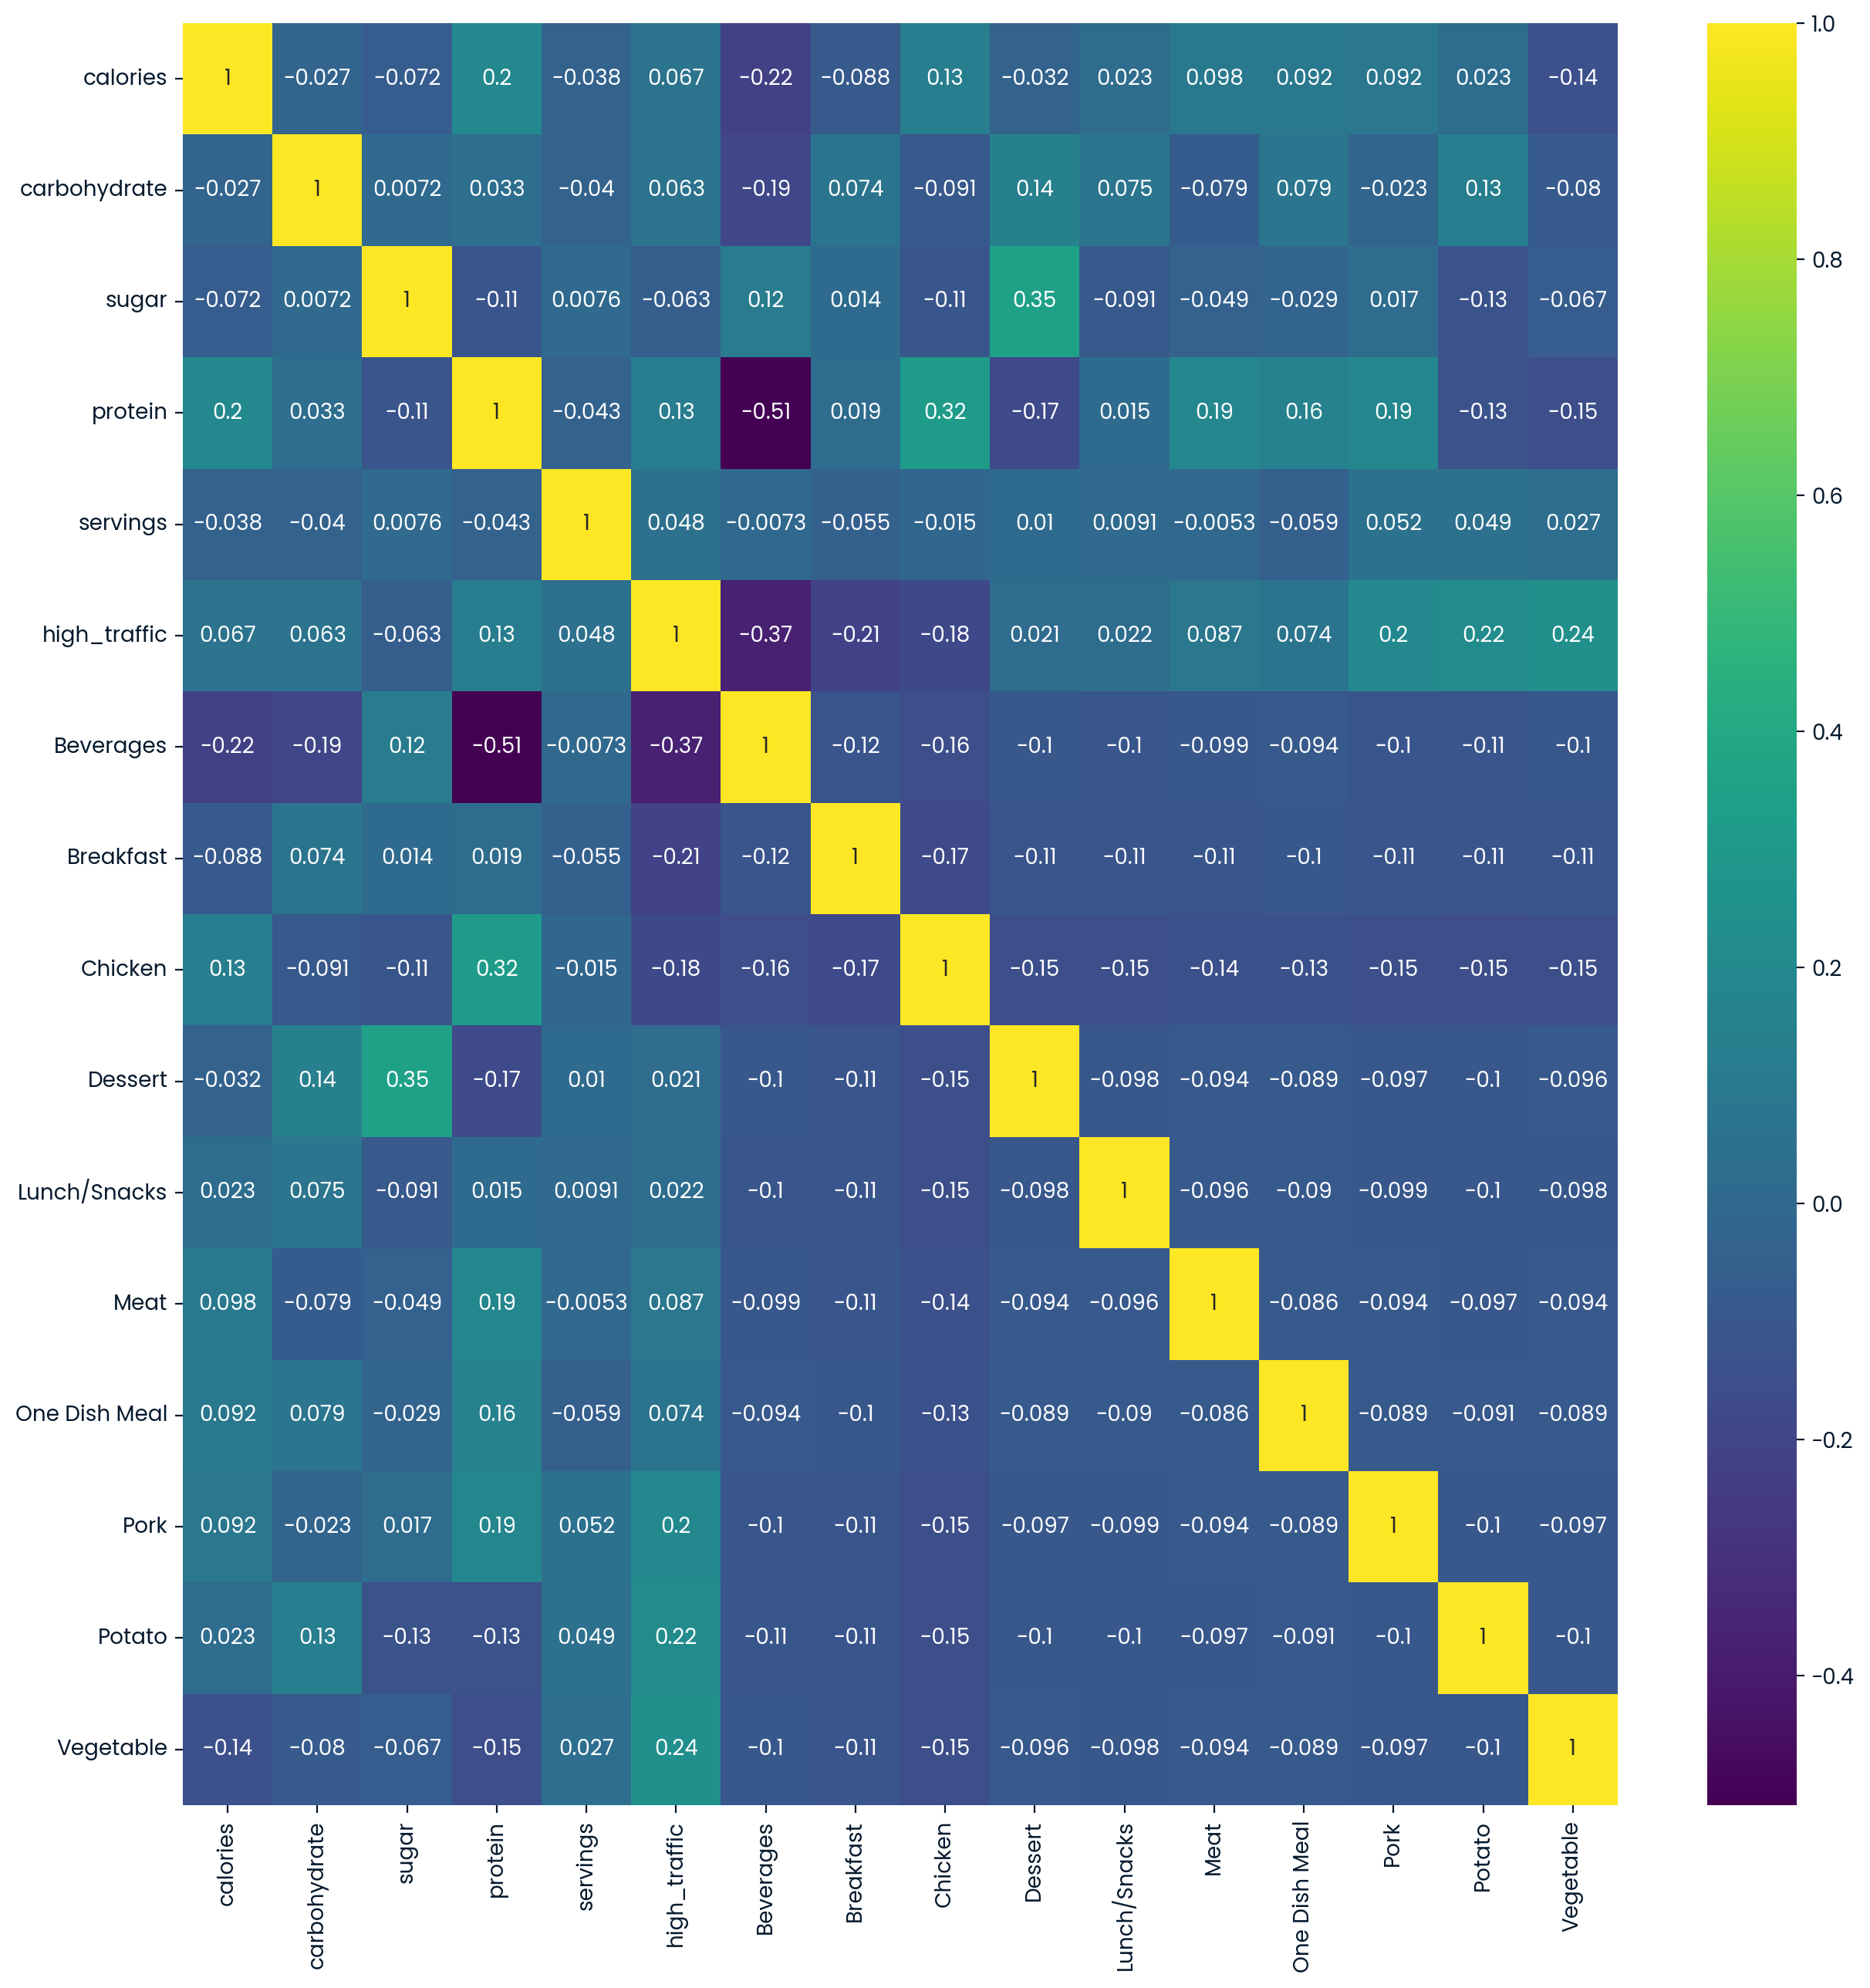

In [73]:
#correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr() , annot = True , cmap = 'viridis')
plt.show()

<h2> Model Building and Fitting </h2>
The following problem consists of correctly finding out if a recipe can yield high traffic or not. Such is a <b>Classification</b> problem. We will use a classification algorithm to try and correctly predict high traffic recipes with as much accuracy and precision as possible. Firstly we will split the data into X and y indicating the target and the explanatory variables. We will further split the data into training and testing sets. We will use the training set to train the model to predict the data, and use the test set to judge the predictions of the model using metrics such as accuracy, precision etc.

<h3> Splitting Data </h3>
We split the data by removing 'high_traffic' from the dataset and storing it into X while storing only 'high_traffic' in y. we futher split the data into training and testing sets with test size 0.3 (indicating that the test set contains 30% of the data while training contains 70%)

In [74]:
X = df.drop('high_traffic' , axis = 1)
y = df['high_traffic']

#stratify with y to keep class balance and shuffle the data to make better predictions
X_train , X_test , y_train , y_test = train_test_split(X , y , stratify = y , test_size=0.3 , shuffle = True , random_state= 10)

In [75]:
#function to get all the necessary metrics
accs = []
precs = []
f1 = []
recalls = []

def get_metrics(ytr , yts , trp , tsp):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    print("Training Predictions\n")
    print(classification_report(ytr , trp))
    
    print("Accuracy : " , np.round(accuracy_score(ytr , trp) , 3))
    
    print("Precision : ", np.round(precision_score(ytr , trp) , 3))
    
    print('Recall : ', np.round(recall_score(ytr , trp) , 3))
    
    print('F1 score : ' , np.round(f1_score(ytr , trp) , 3))
    
    sns.heatmap(confusion_matrix(ytr , trp) , annot = True , cmap = 'viridis' , xticklabels = ['High' , 'Low'] ,     yticklabels = ['High' , 'Low'] , ax = axs[0] , fmt='.0f')
    axs[0].set_title('Training Confusion Matrix')
    

    print('--------------------------------------------------------------------------------------')
    print("Testing Predictions\n")
    print(classification_report(yts , tsp))
    
    print("Accuracy : " , np.round(accuracy_score(yts , tsp) , 3))
    accs.append(accuracy_score(yts , tsp))
    
    print("Precision : " , np.round(precision_score(yts , tsp) , 3))
    precs.append(precision_score(yts , tsp))
    
    print("Recall : " , np.round(recall_score(yts , tsp) , 3))
    recalls.append(recall_score(yts , tsp))
    
    print('F1 score : ' , np.round(f1_score(yts , tsp) , 3))
    f1.append(f1_score(yts , tsp))
    
    sns.heatmap(confusion_matrix(yts , tsp) , annot = True , cmap = 'viridis' , xticklabels = ['High' , 'Low'] ,     yticklabels = ['High' , 'Low'] , ax = axs[1] , fmt='.0f')
    axs[1].set_title('Testing Confusion Matrix')

<h3> Baseline Model (Logistic Regression) </h3>
We use logistic regression as our baseline model, since it is the simplest algorithm. using accuracy and precision as our key metrics (precision means how well we have predicted the correct value over total correct values, meaning how well we predicted high traffic recipes from the total high traffic recipes) we see that logistic regression yields accuracy of 76% and precision of 81%, achieving our goal of correctly predicting high traffic recipes at least 80% of the time. 

Training Predictions

              precision    recall  f1-score   support

           0       0.71      0.68      0.70       260
           1       0.80      0.82      0.81       400

    accuracy                           0.77       660
   macro avg       0.75      0.75      0.75       660
weighted avg       0.76      0.77      0.76       660

Accuracy :  0.765
Precision :  0.798
Recall :  0.82
F1 score :  0.809
--------------------------------------------------------------------------------------
Testing Predictions

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       112
           1       0.81      0.80      0.81       172

    accuracy                           0.77       284
   macro avg       0.76      0.76      0.76       284
weighted avg       0.77      0.77      0.77       284

Accuracy :  0.768
Precision :  0.812
Recall :  0.802
F1 score :  0.807


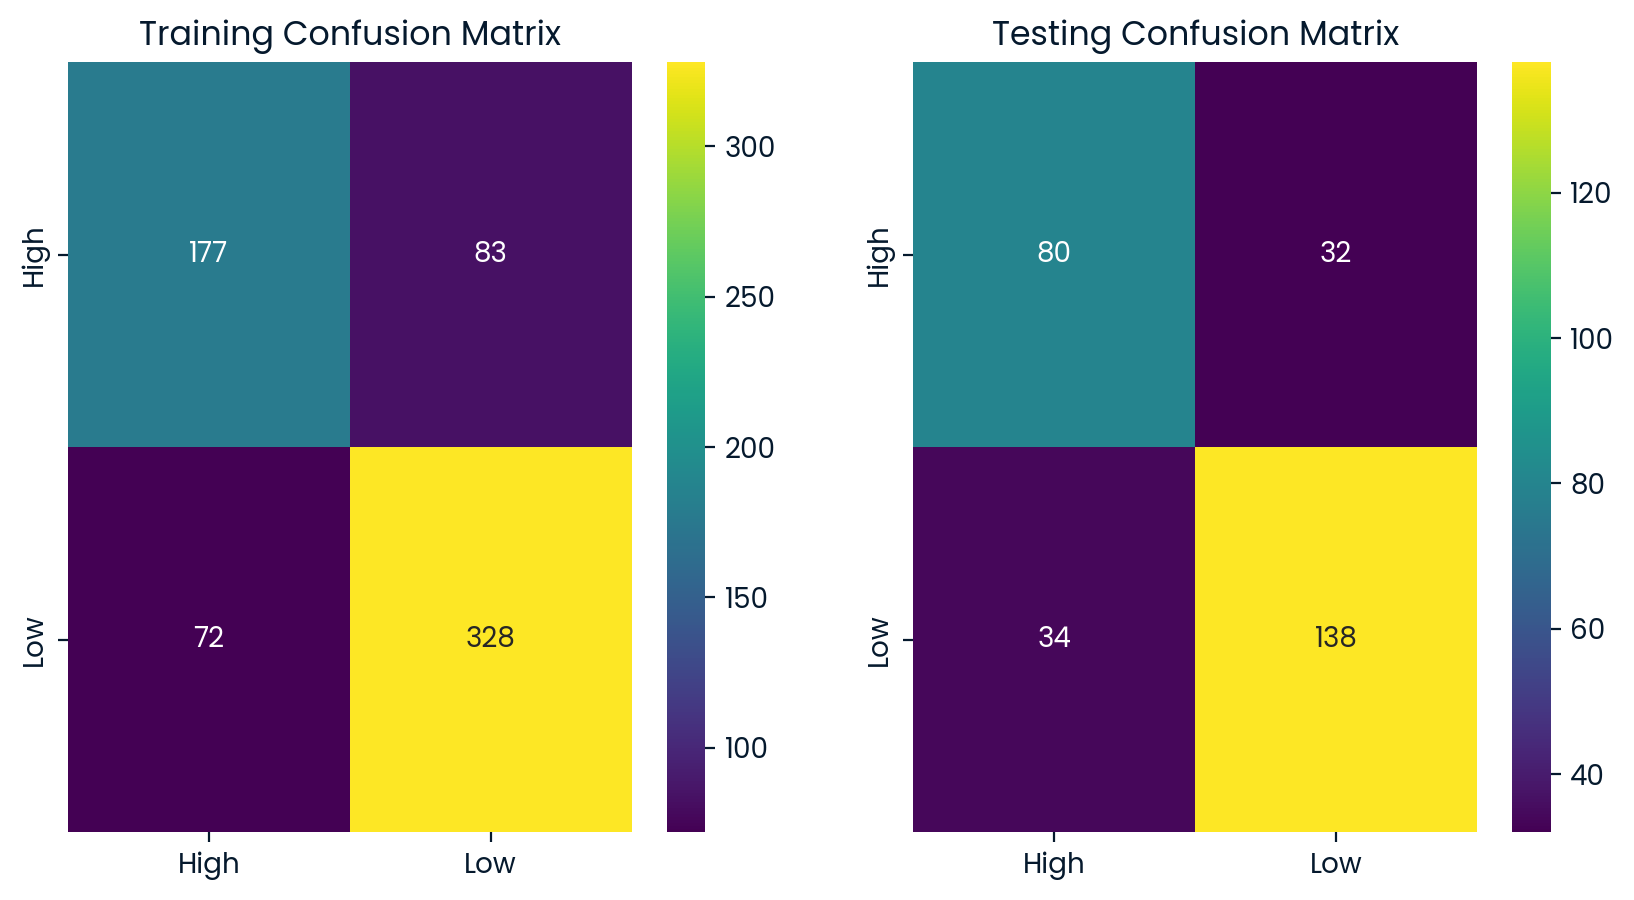

In [76]:
lr = LogisticRegression()

lr.fit(X_train , y_train)

train_preds_lr = lr.predict(X_train)
test_preds_lr = lr.predict(X_test)


get_metrics(y_train , y_test , train_preds_lr , test_preds_lr)

<h3> Comparison Model (SVM) </h3>
For our comparison model, we use SVM (support vector machine). Analyzing the metrics, we see that SVM does underfit the data by a small margin. This could be due to less samples or that the dataset has high bias etc. This causes the model to not generalize well, as seen below.

Training Predictions

              precision    recall  f1-score   support

           0       0.71      0.68      0.70       260
           1       0.80      0.82      0.81       400

    accuracy                           0.77       660
   macro avg       0.76      0.75      0.75       660
weighted avg       0.77      0.77      0.77       660

Accuracy :  0.767
Precision :  0.8
Recall :  0.82
F1 score :  0.81
--------------------------------------------------------------------------------------
Testing Predictions

              precision    recall  f1-score   support

           0       0.69      0.70      0.69       112
           1       0.80      0.80      0.80       172

    accuracy                           0.76       284
   macro avg       0.75      0.75      0.75       284
weighted avg       0.76      0.76      0.76       284

Accuracy :  0.757
Precision :  0.801
Recall :  0.797
F1 score :  0.799


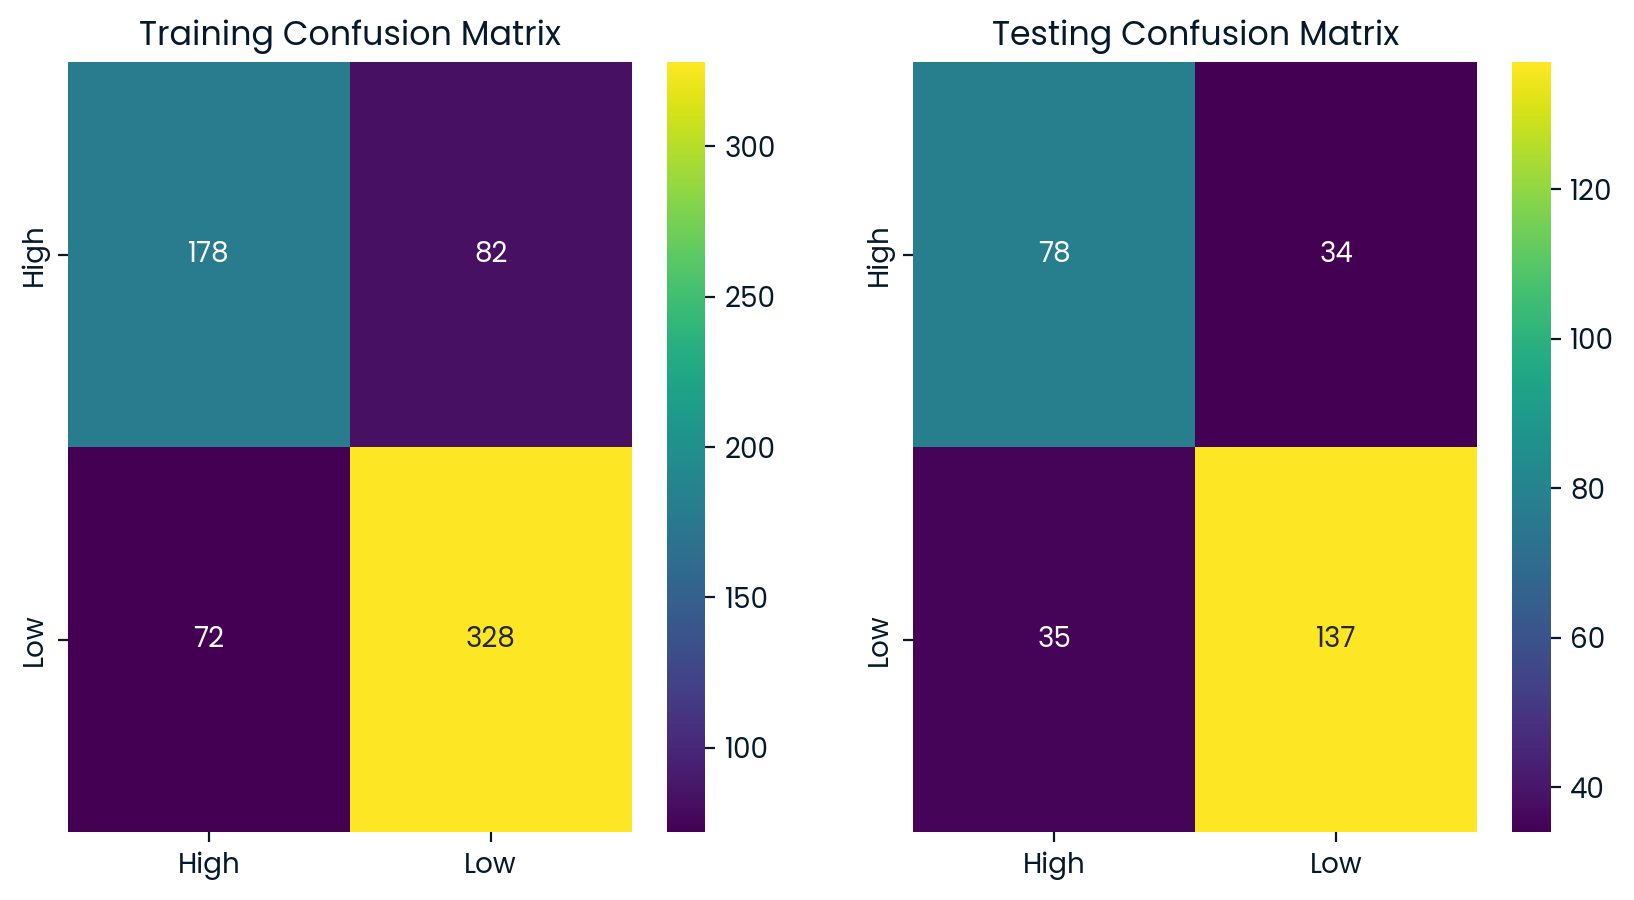

In [77]:
svc = SVC()

svc.fit(X_train , y_train)

train_preds_svc = svc.predict(X_train)
test_preds_svc = svc.predict(X_test)

get_metrics(y_train , y_test , train_preds_svc , test_preds_svc)

<h3> Comparing Both Models </h3>
We can see that both models perform almost the same on the training data. However, Logistic Regression shows a slight edge over SVM on testing.<br> 
- Logistic Regression has a slightly higher testing accuracy (0.768 vs. 0.757).<br>
- Logistic Regression also has marginally better precision and recall on the test set (0.812 and 0.802) compared to SVM (0.801 and 0.797).

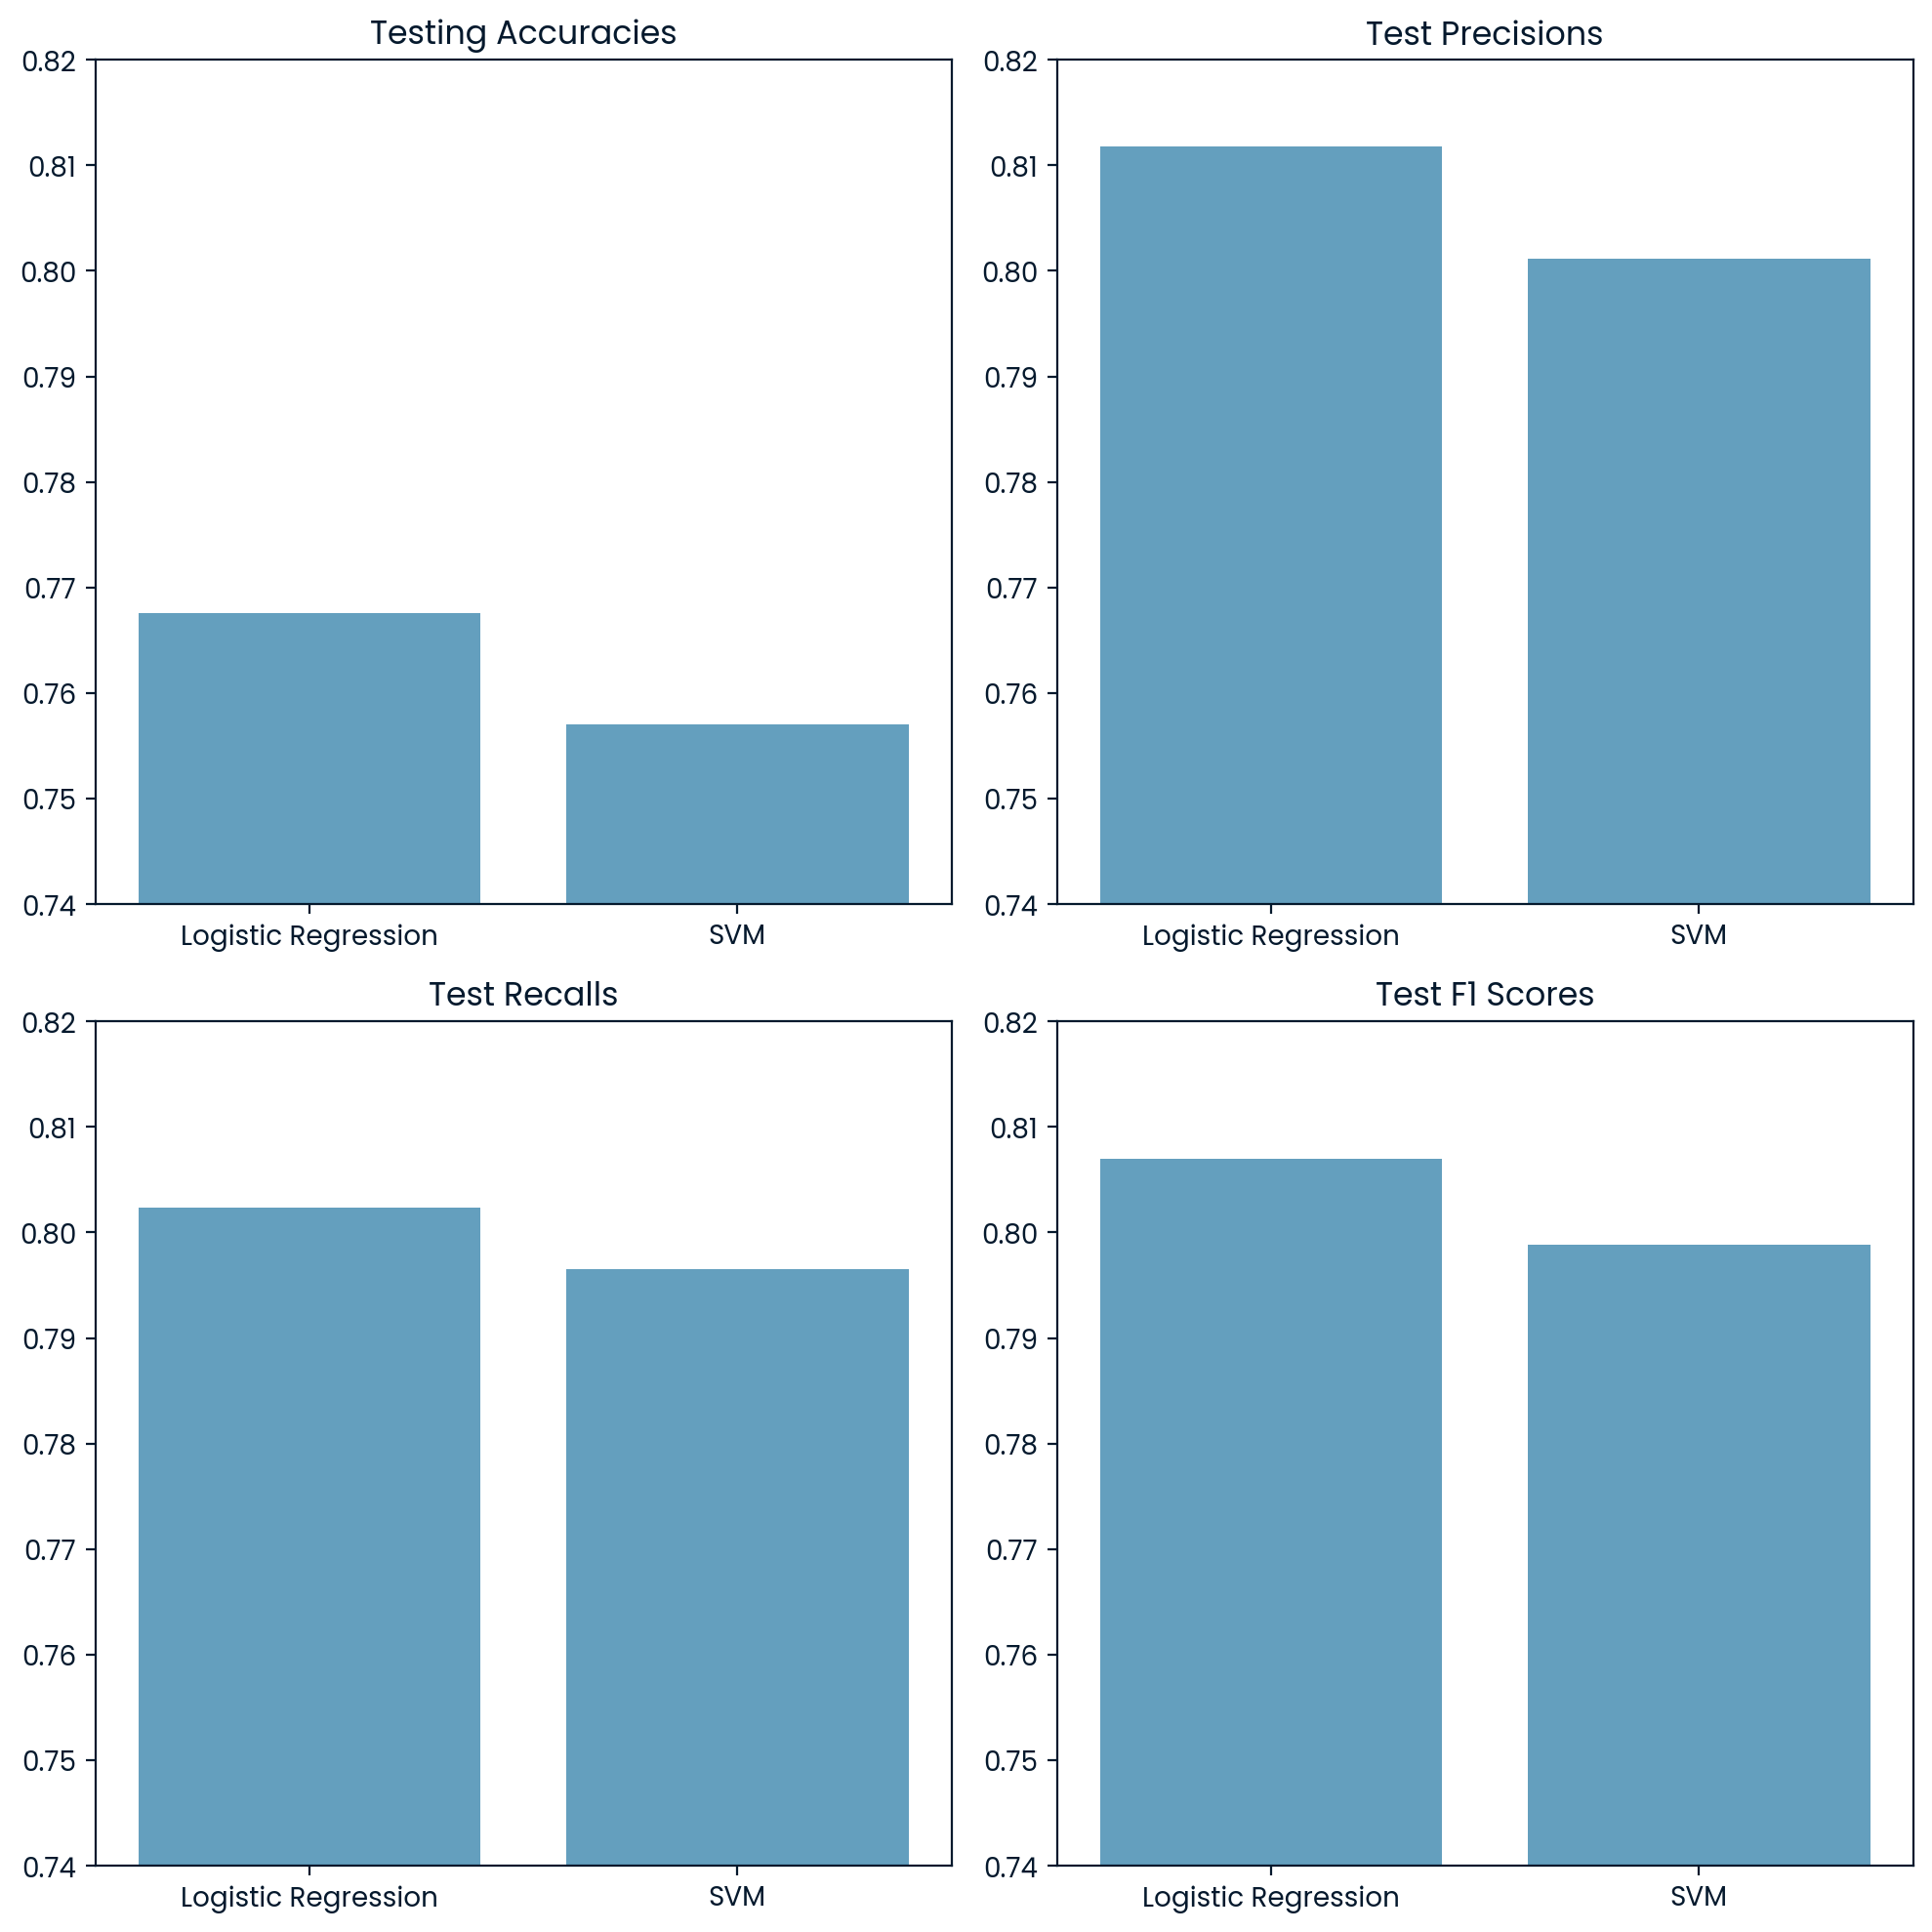

In [78]:
models = ['Logistic Regression' , 'SVM']

#plotting all metrics
fig , axs = plt.subplots(2 ,2 , figsize = (10,10))

sns.barplot(x = models , y = [accs[0] , accs[1]] , ax = axs[0,0])
axs[0,0].set_title('Testing Accuracies')
axs[0,0].set_ylim(0.74, 0.82)

sns.barplot(x = models , y = [precs[0] , precs[1]] , ax = axs[0,1])
axs[0,1].set_title('Test Precisions')
axs[0,1].set_ylim(0.74, 0.82)

sns.barplot(x = models , y = [recalls[0] , recalls[1]] , ax = axs[1,0])
axs[1,0].set_title('Test Recalls')
axs[1,0].set_ylim(0.74, 0.82)

sns.barplot(x = models , y = [f1[0] , f1[1]] , ax = axs[1,1])
axs[1,1].set_title('Test F1 Scores')
axs[1,1].set_ylim(0.74, 0.82)

plt.tight_layout()
plt.show()

<h3> Defining and Analyzing the KPI </h3>

The KPI that we will define and use is the <b>f1 score</b> of each model. The f1 score of a model refers to the harmonic mean between the precision and recall. We understand that precision refers to the amount of correct predictions of the positive class out of the total predictions we make to the positive class (also known as Positive Prediction Value). Recall refers to the metric used to find the fraction of values predicted of positive class out of the total value of truly positive class. <br> <br>

To understand this in the business context, high precision ensures that most of the predicted high-traffic recipes are actually high-traffic, while recall ensures that most of the actual high-traffic recipes are identified. The f1 score balances recall and precision making it a cruicial KPI. <br><br>
 
We see that Logistic Regression has a higher F1-score, indicating that it balances precision and recall in identifying high-traffic recipes better than SVM.


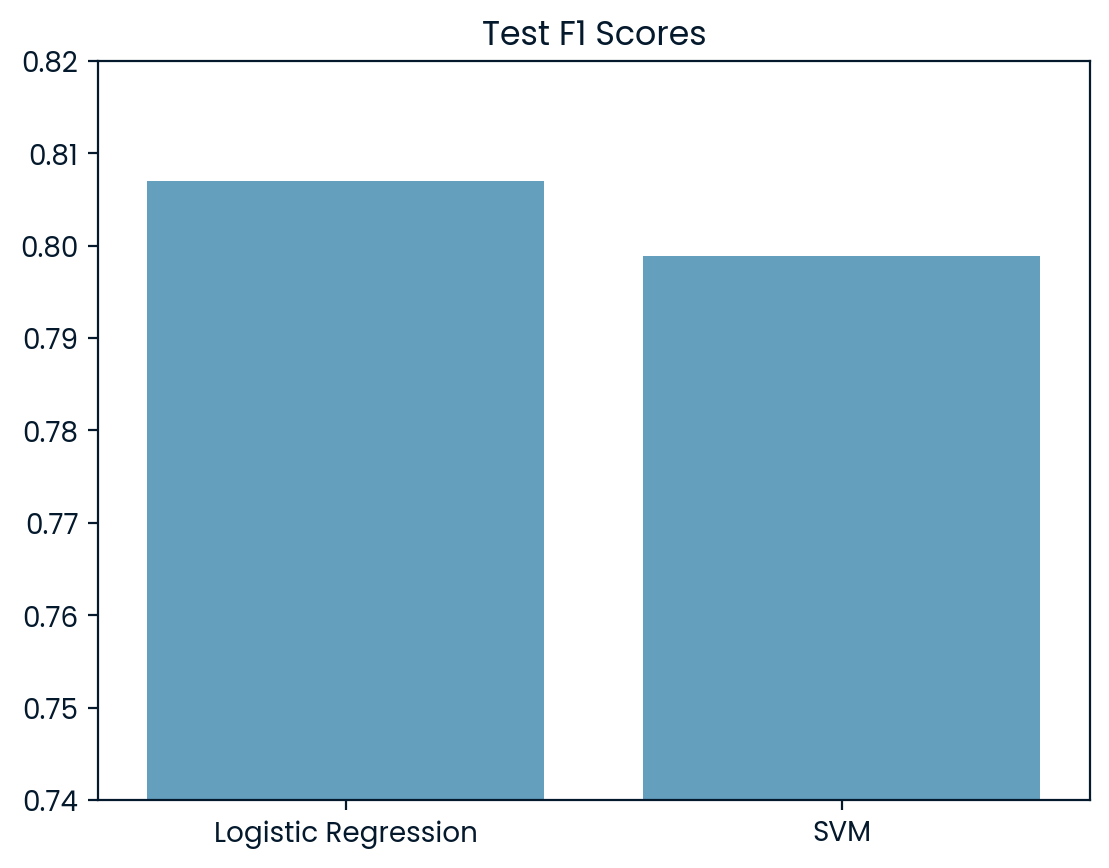

In [79]:
ax = sns.barplot(x = models , y = [f1[0] , f1[1]])
ax.set_title('Test F1 Scores')
ax.set_ylim(0.74, 0.82)
plt.show()

<h2> The Business Prespective </h2> 
Lets now look at the business and what we are trying to accomplish.

<h3> The Business Goal </h3>

The main aspect for this analysis and the business goal is to keep recipes that are popular and minimize the ones that are unpopular. Keeping and promoting high traffic recipes will increase user traffic.

<h3> Addressing the Business Problem </h3>

The work done in this notebook helps to analyze and predict the recipes that are high traffic. By doing so and accurately and precisely identifying high traffic recipes, the following can be done: <br>
- Promotion of high traffic recipes. <br>
- Marketing strategies for high traffic recipes. <br>
- Including more high traffic recipes of the same category. <br>

By following the steps above and other similar steps, the business can increase its user traffic, thereby resulting in increased reach and higher profitability which helps the business grow and expand further,

<h3> Future Recommendations </h3>
Using the model built in this notebook that predicts high traffic recipes about 80% of the time, the following recommendations can be made: <br>
- Implement Logistic Regression and deploy the model using any API.<br>
- Test the model on new recipes and compare its predictions.<br>
- Collect more data and refine the data for improving the model.<br>
- Update and adapt the model to include more features or new recipes for better performance.<br>

<h2> Conclusion </h2>
To Summarize, we performed a comprehensive analysis on a dataset to predict wether a given recipe yields high or low traffic to the website. We understood that Logistic Regression served as the most optimal model, as it predicted high traffic recipes better than the other model. <br><br>
We analyzed the data with various plots and found the recipes that yield the most traffic. Some of the many recipes with high traffic belonged to the 'pork' , 'vegetable' , 'potato' category. <br><br>
Furthermore, keeping the business goal in mind we evaluate the model based on its precision as predicting the true positive class from all positive predictions helps to ensure that when the model predicts a high traffic recipe, it is likely to be correct. This helps to save the business from any significant losses. <br><br>
Finally, we used a suitable KPI to measure both models. The KPI was f1 score, which balanced both precision and recall. 